In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Importing data, Understanding data, cleaning data and EDA

In [2]:
# importing libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Importing Data Set
C_DF = pd.read_csv(r"E:\Data Science\ML\PCA\Assignment\Country-data.csv")

In [4]:
# viewing data frame
C_DF.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [5]:
# shape of the dataframe
C_DF.shape

(167, 10)

In [6]:
# information of data frame to know types of datatype of columns and also knowing about null values
C_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.1+ KB


In [7]:
# description of dataframe to know about mean, standard deviation and quartiles
C_DF.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [8]:
# percentage of missing values in dataframe
round(100*(C_DF.isnull().sum()/len(C_DF.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

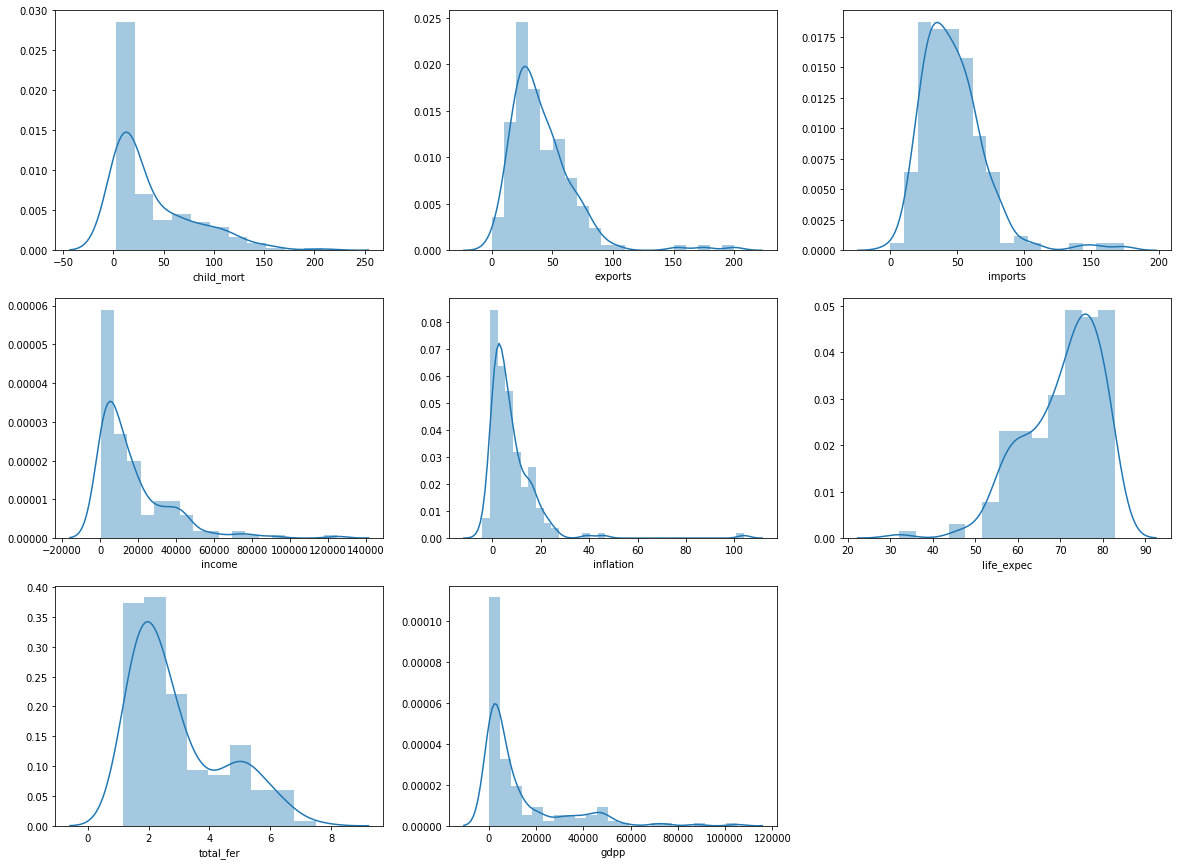

In [9]:
# checking distribution of data

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(C_DF['child_mort'])

plt.subplot(3,3,2)
sns.distplot(C_DF['exports'])

plt.subplot(3,3,3)
sns.distplot(C_DF['imports'])

plt.subplot(3,3,4)
sns.distplot(C_DF['income'])

plt.subplot(3,3,5)
sns.distplot(C_DF['inflation'])

plt.subplot(3,3,6)
sns.distplot(C_DF['life_expec'])

plt.subplot(3,3,7)
sns.distplot(C_DF['total_fer'])

plt.subplot(3,3,8)
sns.distplot(C_DF['gdpp'])
plt.show()


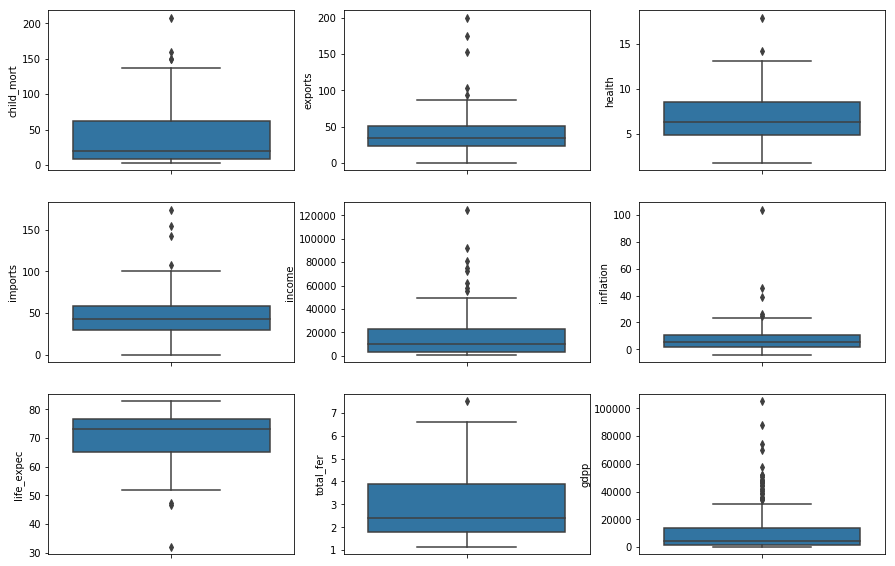

In [10]:
# understanding data to check outliers

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.boxplot(y=C_DF.child_mort)

plt.subplot(3,3,2)
sns.boxplot(y=C_DF.exports)

plt.subplot(3,3,3)
sns.boxplot(y=C_DF.health)

plt.subplot(3,3,4)
sns.boxplot(y=C_DF.imports)

plt.subplot(3,3,5)
sns.boxplot(y=C_DF.income)

plt.subplot(3,3,6)
sns.boxplot(y=C_DF.inflation)

plt.subplot(3,3,7)
sns.boxplot(y=C_DF.life_expec)

plt.subplot(3,3,8)
sns.boxplot(y=C_DF.total_fer)

plt.subplot(3,3,9)
sns.boxplot(y=C_DF.gdpp)

plt.show()

In [11]:
# Checking outliers at 25%,50%,75%,90%,95% and 99%
C_DF.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
90%    100.220000   70.800000   10.940000   75.420000   41220.000000   
95%    116.000000   80.570000   11.570000   81.140000   48290.000000   
99%    153.400000  160.480000   13.474000  146.080000   84374.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [12]:
C_DF.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [13]:
C_DF.country.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [14]:
#changing country name to lower case 
C_DF.country = C_DF.country.str.lower()

In [15]:
## checking for the duplicates in country column
C_DF.country.unique

<bound method Series.unique of 0                         afghanistan
1                             albania
2                             algeria
3                              angola
4                 antigua and barbuda
5                           argentina
6                             armenia
7                           australia
8                             austria
9                          azerbaijan
10                            bahamas
11                            bahrain
12                         bangladesh
13                           barbados
14                            belarus
15                            belgium
16                             belize
17                              benin
18                             bhutan
19                            bolivia
20             bosnia and herzegovina
21                           botswana
22                             brazil
23                             brunei
24                           bulgaria
25                 

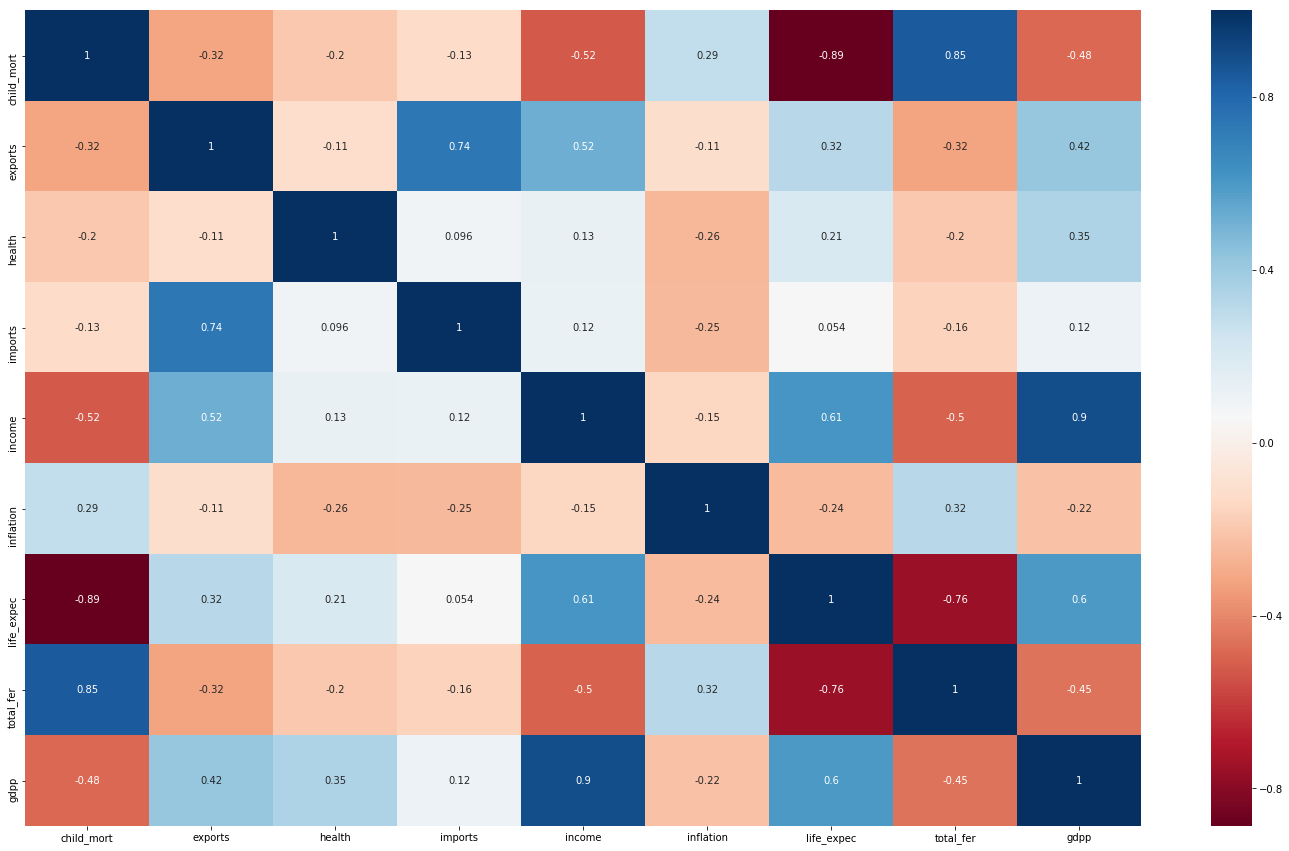

In [16]:
#heatmap to determine the correlation coefficients between variables
plt.figure(figsize = (25,15)) 
sns.heatmap(C_DF.corr(),annot = True,cmap="RdBu")

In [17]:
#dropping 'country name' column 
country_names = C_DF['country']
c_new = C_DF.drop('country',axis=1)

<Figure size 7200x7200 with 0 Axes>

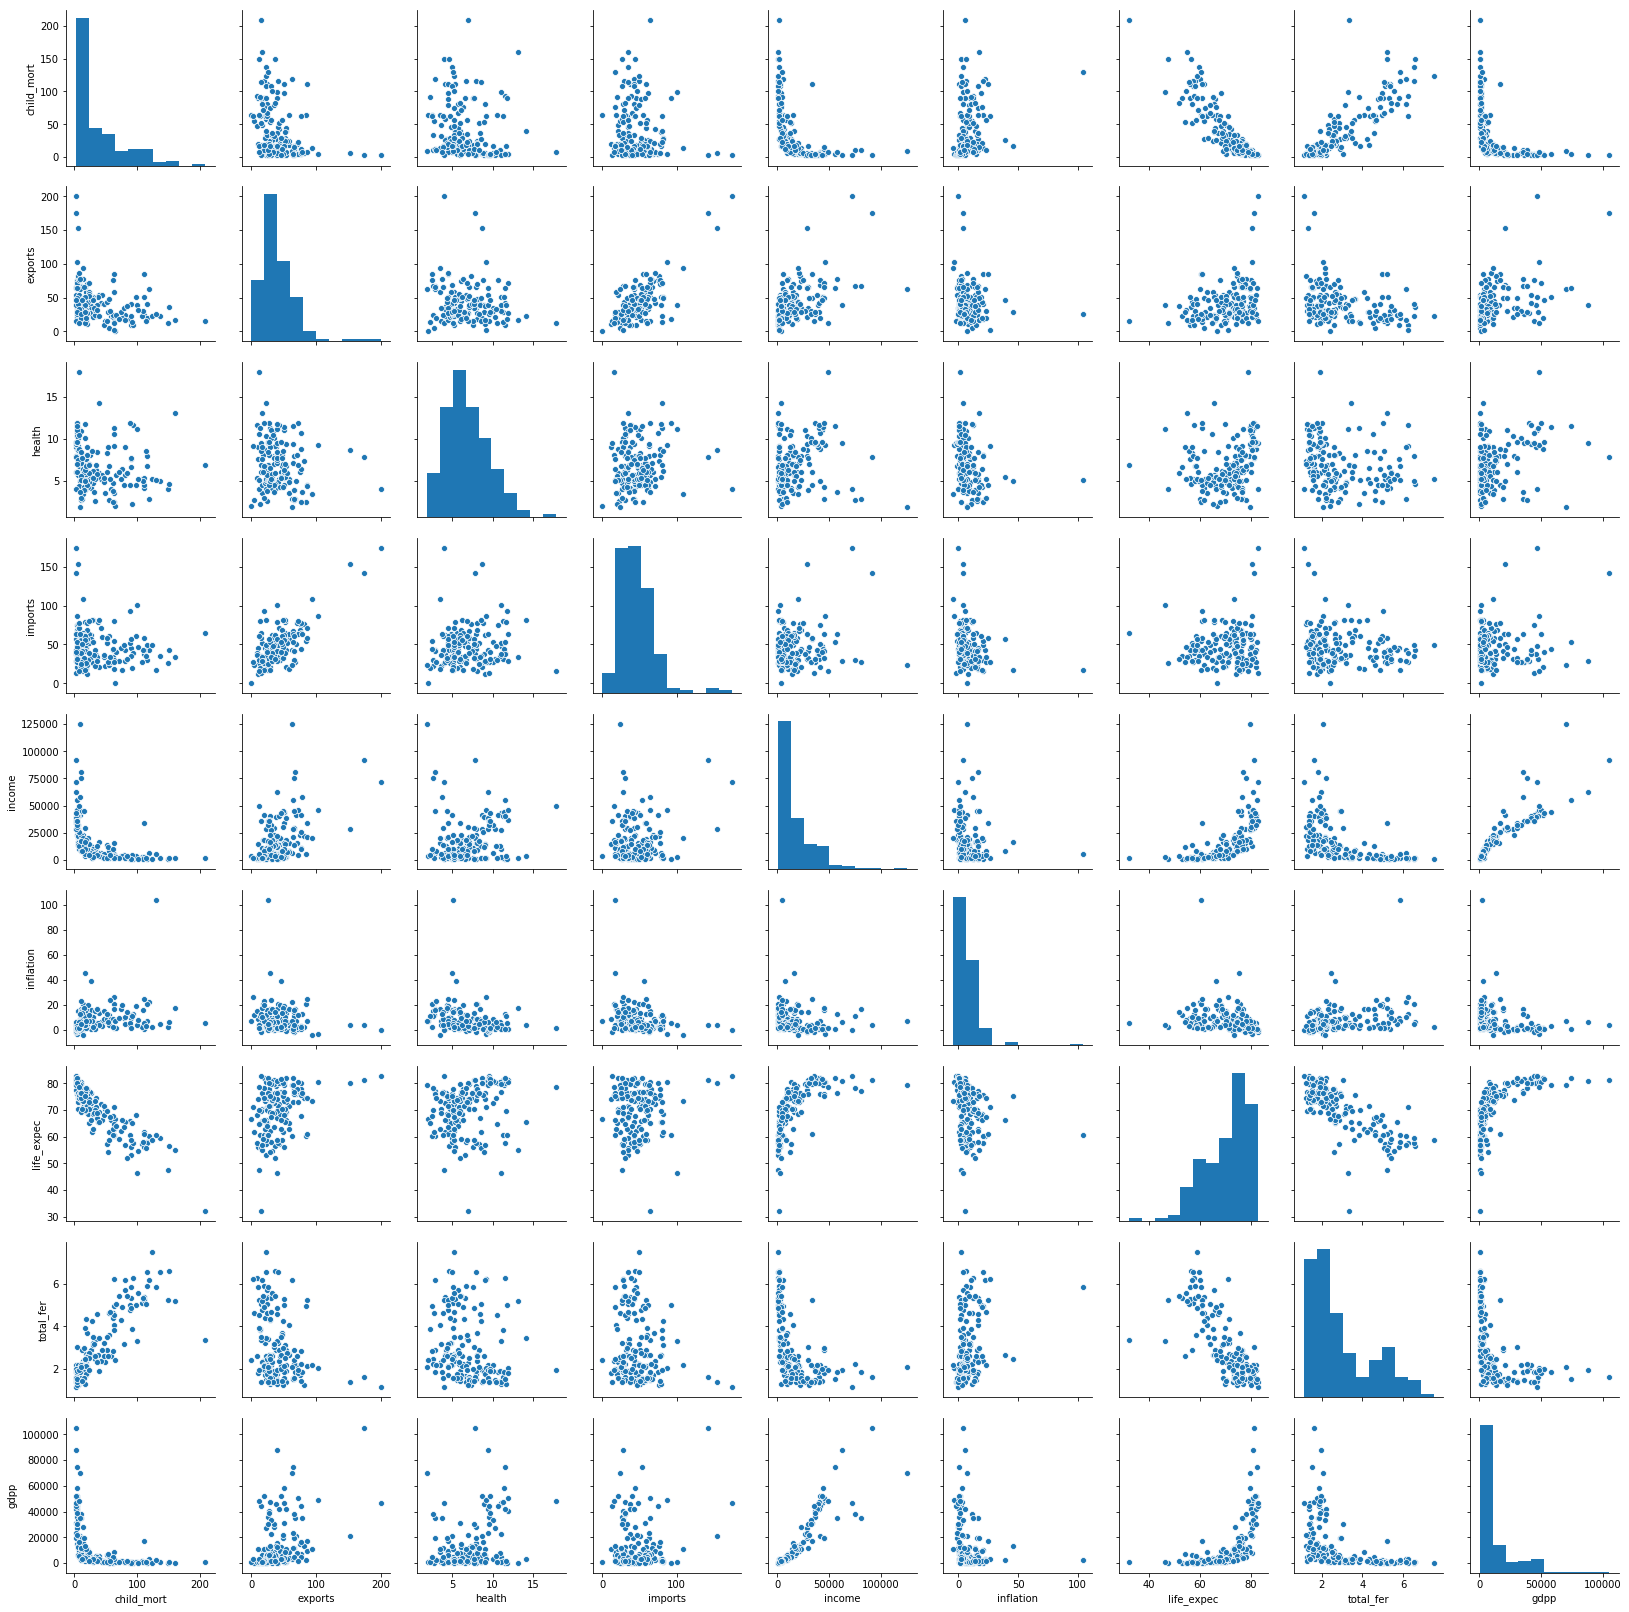

In [18]:
# pair plotting
plt.figure(figsize=(100, 100))
sns.pairplot(c_new)
plt.show()

# Principle Component Analysis - PCA model building

#### To avoid multicolinearity, to get linearly independent columns and dimensions reduction purpose we do pca on the dataframe, here in this model, without removing outliers building pca model because due to outlier treatment we are loosing few countries information which is very important for building model

In [19]:
## Let's scale the data with mean of '0' and standard deviation of 1

from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
C_DF_2 = standard_scaler.fit_transform(c_new)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [20]:
## Let's change the standardized data to a dataframe

C_DF_2 = pd.DataFrame(C_DF_2)
C_DF_2.columns = c_new.columns
C_DF_2.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

In [21]:
# after standardized data looking statistical description to know about mean, std and quartiles
C_DF_2.describe()

child_mort       exports        health       imports        income  \
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02   
mean  -2.659217e-17  2.383323e-16  5.218713e-16  2.871954e-16 -7.512288e-17   
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00   
min   -8.871383e-01 -1.500192e+00 -1.827827e+00 -1.939940e+00 -8.603259e-01   
25%   -7.466190e-01 -6.333367e-01 -6.922106e-01 -6.914785e-01 -7.174558e-01   
50%   -4.717981e-01 -2.235279e-01 -1.810007e-01 -1.487432e-01 -3.738080e-01   
75%    5.926666e-01  3.747198e-01  6.515412e-01  4.913530e-01  2.942370e-01   
max    4.221297e+00  5.813835e+00  4.047436e+00  5.266181e+00  5.611542e+00   

          inflation    life_expec     total_fer          gdpp  
count  1.670000e+02  1.670000e+02  1.670000e+02  1.670000e+02  
mean   8.376533e-17  3.616535e-16  3.124580e-16  2.127373e-17  
std    1.003008e+00  1.003008e+00  1.003008e+00  1.003008e+00  
min   -1.137852e+00 -4.337186e+00 -1.191250e+00 -6.968005e-01  
25%   -5.666409e-01 -5.927576e-01 -7.639023e-01 -6.366596e-01  
50%   -2.269504e-01  2.869576e-01 -3.564309e-01 -4.544309e-01  
75%    2.816364e-01  7.042584e-01  6.175252e-01  5.942100e-02  
max    9.129718e+00  1.380962e+00  3.009349e+00  5.036507e+00

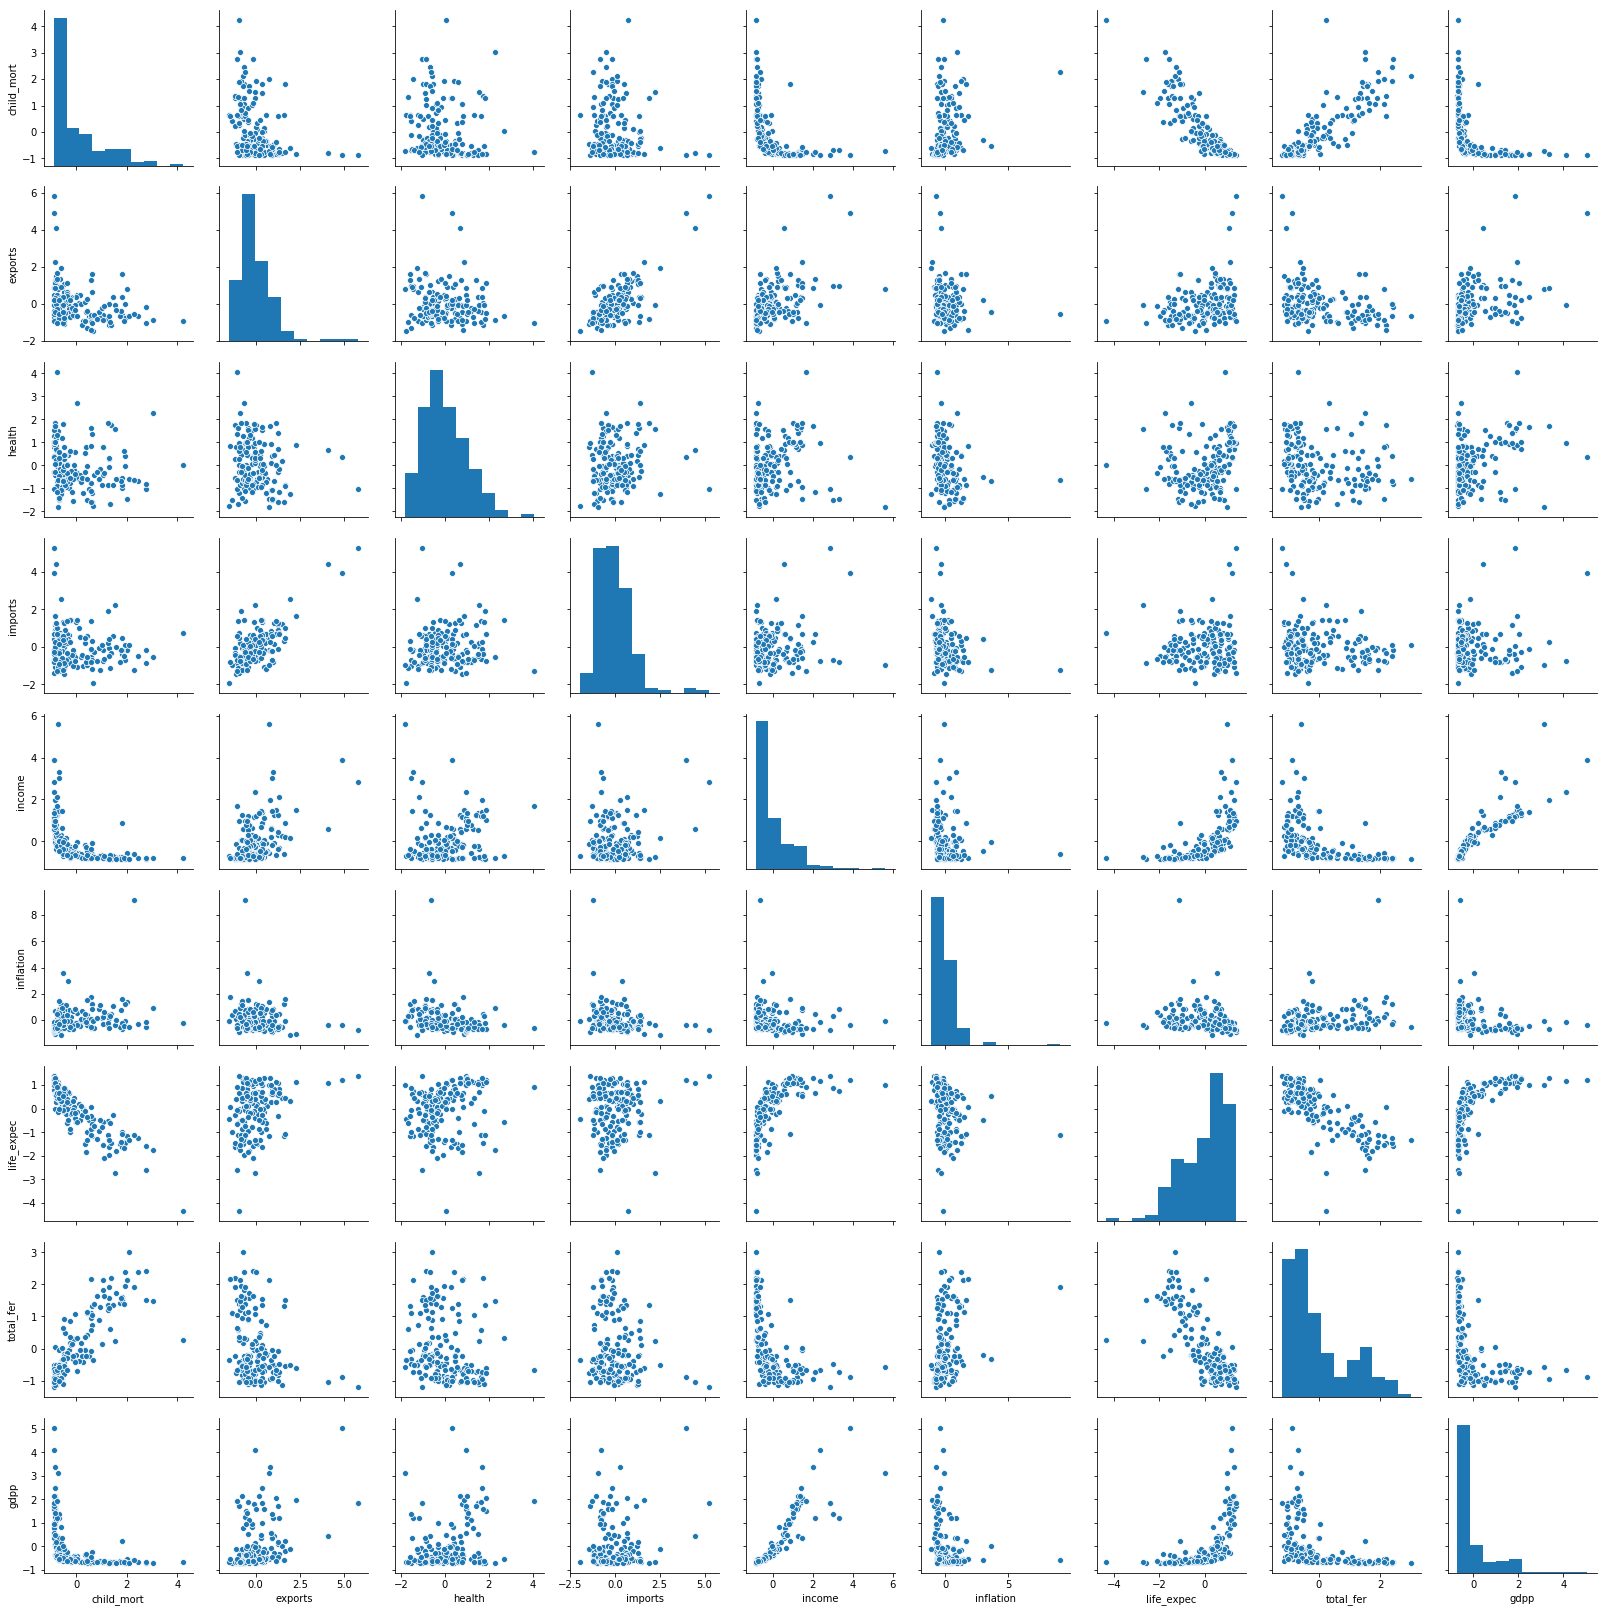

In [22]:
# pair plot after scaling
sns.pairplot(C_DF_2)
plt.show()

In [26]:
# Importing  PCA package from sklearn library

from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [27]:
# fitting pca for cdf_2 dataset into Principle components
pca.fit(C_DF_2)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [28]:
# the principle components to find the correlation between various variables & principle components
pca.components_

array([[-0.41951945,  0.28389698,  0.15083782,  0.16148244,  0.39844111,
        -0.19317293,  0.42583938, -0.40372896,  0.39264482],
       [ 0.19288394,  0.61316349, -0.24308678,  0.67182064,  0.02253553,
        -0.00840447, -0.22270674,  0.15523311, -0.0460224 ],
       [-0.02954353,  0.14476069, -0.59663237, -0.29992674,  0.3015475 ,
         0.64251951,  0.11391854,  0.01954925,  0.12297749],
       [ 0.37065326,  0.00309102,  0.4618975 , -0.07190746,  0.39215904,
         0.15044176, -0.20379723,  0.37830365,  0.53199457],
       [-0.16896968,  0.05761584,  0.51800037,  0.25537642, -0.2471496 ,
         0.7148691 ,  0.1082198 , -0.13526221, -0.18016662],
       [ 0.20062815, -0.05933283,  0.00727646, -0.03003154,  0.16034699,
         0.06628537, -0.60112652, -0.75068875,  0.01677876],
       [-0.07948854, -0.70730269, -0.24983051,  0.59218953,  0.09556237,
         0.10463252,  0.01848639,  0.02882643,  0.24299776],
       [-0.68274306, -0.01419742,  0.07249683, -0.02894642,  0

In [29]:
#Below is the code to find the relation between various features and PC's
column_names = list(C_DF_2.columns)
principle_comp = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],
                                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                                       'PC5':pca.components_[4], 'Feature':column_names})
principle_comp

PC1       PC2       PC3       PC4       PC5     Feature
0 -0.419519  0.192884 -0.029544  0.370653 -0.168970  child_mort
1  0.283897  0.613163  0.144761  0.003091  0.057616     exports
2  0.150838 -0.243087 -0.596632  0.461897  0.518000      health
3  0.161482  0.671821 -0.299927 -0.071907  0.255376     imports
4  0.398441  0.022536  0.301548  0.392159 -0.247150      income
5 -0.193173 -0.008404  0.642520  0.150442  0.714869   inflation
6  0.425839 -0.222707  0.113919 -0.203797  0.108220  life_expec
7 -0.403729  0.155233  0.019549  0.378304 -0.135262   total_fer
8  0.392645 -0.046022  0.122977  0.531995 -0.180167        gdpp

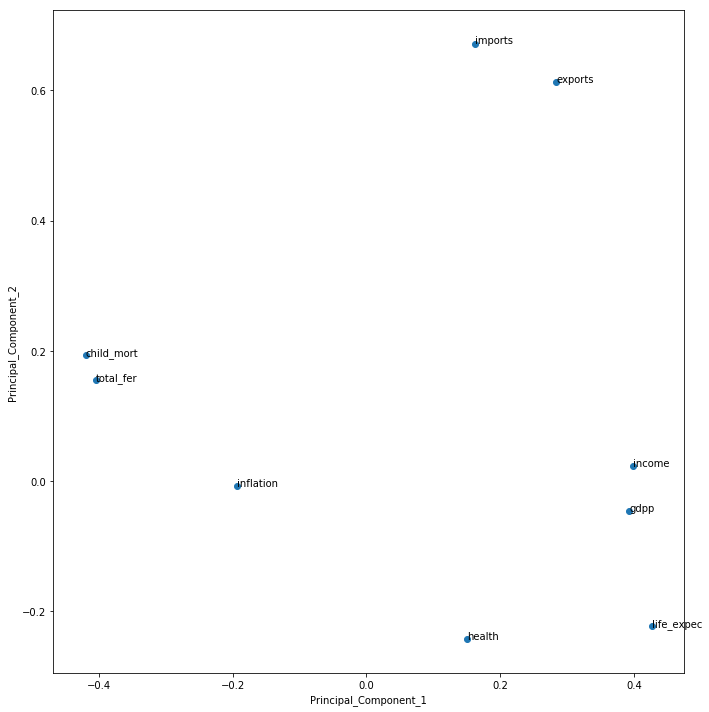

In [30]:
## Let's plot PC1 vs PC2

%matplotlib inline
fig = plt.figure(figsize = (10,10))
plt.scatter(principle_comp.PC1, principle_comp.PC2)
plt.xlabel('Principal_Component_1')
plt.ylabel('Principal_Component_2')
for i, txt in enumerate(principle_comp.Feature):
    plt.annotate(txt, (principle_comp.PC1[i],principle_comp.PC2[i]))
plt.tight_layout()
plt.show()

#### By the above observation principal compoent 1 had more weight on life expec and health  and principle component 2 has more weight on imports and exports

In [31]:
#finding how much variance is explained by each from pricniple components 
pca.explained_variance_ratio_

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

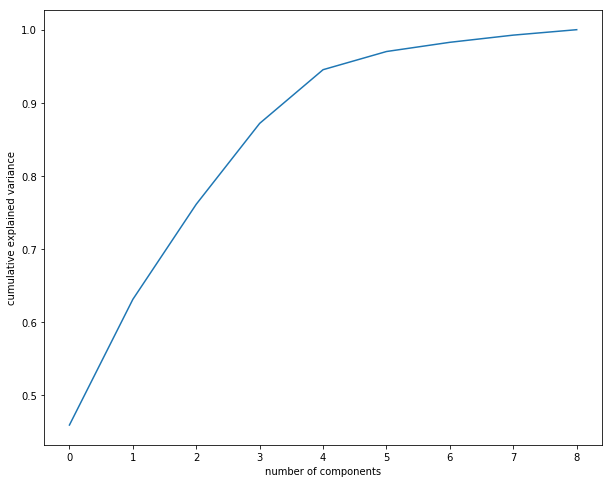

In [32]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### From the scree plot we observed that 5 components holding 95% of variance

### Now by using incremental PCA for more efficiency and in this case '5' is good number of principle components


In [33]:
from sklearn.decomposition import IncrementalPCA
pcafinal = IncrementalPCA(n_components=5)

In [34]:
# Fitting the selected incremental PCA
pca_cont = pcafinal.fit_transform(C_DF_2)
pca_cont.shape

(167, 5)

In [35]:
# printing
print(pca_cont)

[[-2.91299992e+00  9.19694483e-02 -7.21242475e-01  1.00183771e+00
  -1.46764708e-01]
 [ 4.29869882e-01 -5.89373005e-01 -3.28611009e-01 -1.16501385e+00
   1.53205240e-01]
 [-2.85288747e-01 -4.52138721e-01  1.23205055e+00 -8.57767020e-01
   1.91227155e-01]
 [-2.93271361e+00  1.69877055e+00  1.52507602e+00  8.55595497e-01
  -2.14777969e-01]
 [ 1.03337146e+00  1.33852736e-01 -2.16699200e-01 -8.46637655e-01
  -1.93186250e-01]
 [ 2.28903436e-02 -1.77273550e+00  8.64499533e-01 -3.67466174e-02
   9.97895254e-01]
 [-1.01463164e-01 -5.67317984e-01  2.48106950e-01 -1.46602345e+00
  -8.58319260e-02]
 [ 2.34215326e+00 -1.98970971e+00  1.98795068e-01  1.11341263e+00
  -7.10653789e-01]
 [ 2.97384111e+00 -7.35152104e-01 -5.28284369e-01  1.20110137e+00
   8.01665136e-02]
 [-1.81302843e-01 -3.96894805e-01  8.68398935e-01 -4.35201409e-01
   1.20357259e-01]
 [ 1.26873963e+00 -6.58657937e-01 -4.84554953e-01  5.39449943e-02
  -3.98859366e-01]
 [ 1.67102427e+00  5.63934168e-01  9.97464453e-01 -1.97912392e-01

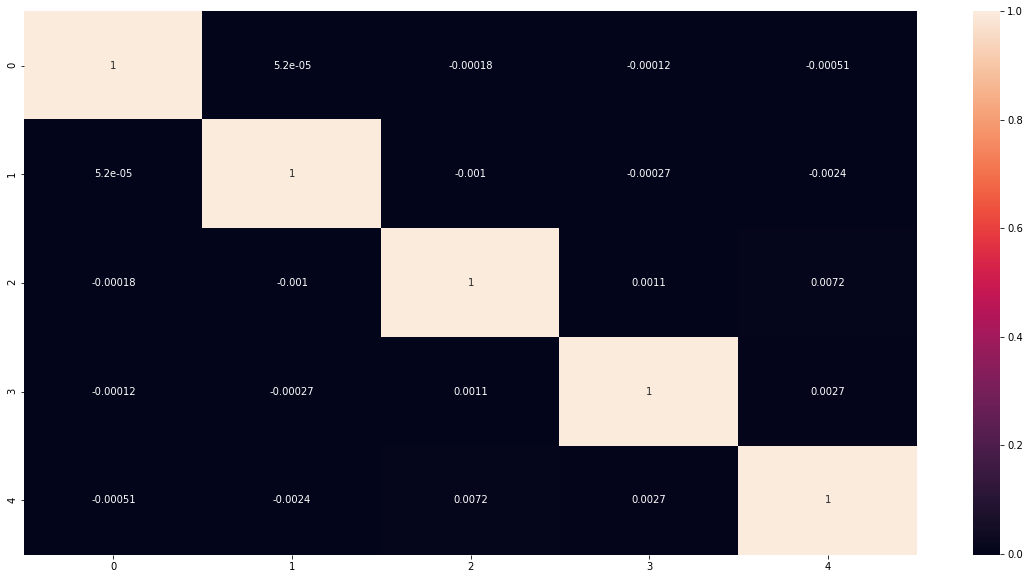

In [36]:
# correlation heatmap for the principal components
correlation_mat = np.corrcoef(pca_cont.transpose())
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(correlation_mat,annot = True)

In [37]:

corrmat_nodiag = correlation_mat - np.diagflat(correlation_mat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)


max corr: 0.007194543060491426 , min corr:  -0.002374704497495838


#### # 1s -> 0s in diagonals
#### # we see that correlations are indeed very close to 0

### now we can see that all features having less correlation between them

In [38]:

## principle components are explaining the variance
pcafinal.explained_variance_ratio_

array([0.45950112, 0.1717258 , 0.1295817 , 0.11045942, 0.07191446])

#### From above 5 components are explaining approximately 95% of variance of data
#### Hence Incremental PCA did great job 

In [39]:
# change our PCA matrix ('U' matrix in SVD) to dataframe

c_cont = pd.DataFrame(pca_cont)
c_cont.columns = ['pca1','pca2','pca3','pca4', 'pca5']

In [40]:
# add our original columns to above principle components dataframe (merging PCA & Non PCA columns)
# helps us to correlate between various principle components and original variables
df_new = pd.concat([c_cont,C_DF_2],axis=1)

In [41]:
df_new.head()

pca1      pca2      pca3      pca4      pca5  child_mort   exports  \
0 -2.913000  0.091969 -0.721242  1.001838 -0.146765    1.291532 -1.138280   
1  0.429870 -0.589373 -0.328611 -1.165014  0.153205   -0.538949 -0.479658   
2 -0.285289 -0.452139  1.232051 -0.857767  0.191227   -0.272833 -0.099122   
3 -2.932714  1.698771  1.525076  0.855595 -0.214778    2.007808  0.775381   
4  1.033371  0.133853 -0.216699 -0.846638 -0.193186   -0.695634  0.160668   

     health   imports    income  inflation  life_expec  total_fer      gdpp  
0  0.279088 -0.082455 -0.808245   0.157336   -1.619092   1.902882 -0.679180  
1 -0.097016  0.070837 -0.375369  -0.312347    0.647866  -0.859973 -0.485623  
2 -0.966073 -0.641762 -0.220844   0.789274    0.670423  -0.038404 -0.465376  
3 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   2.128151 -0.516268  
4 -0.286894  0.497568  0.101732  -0.601749    0.704258  -0.541946 -0.041817

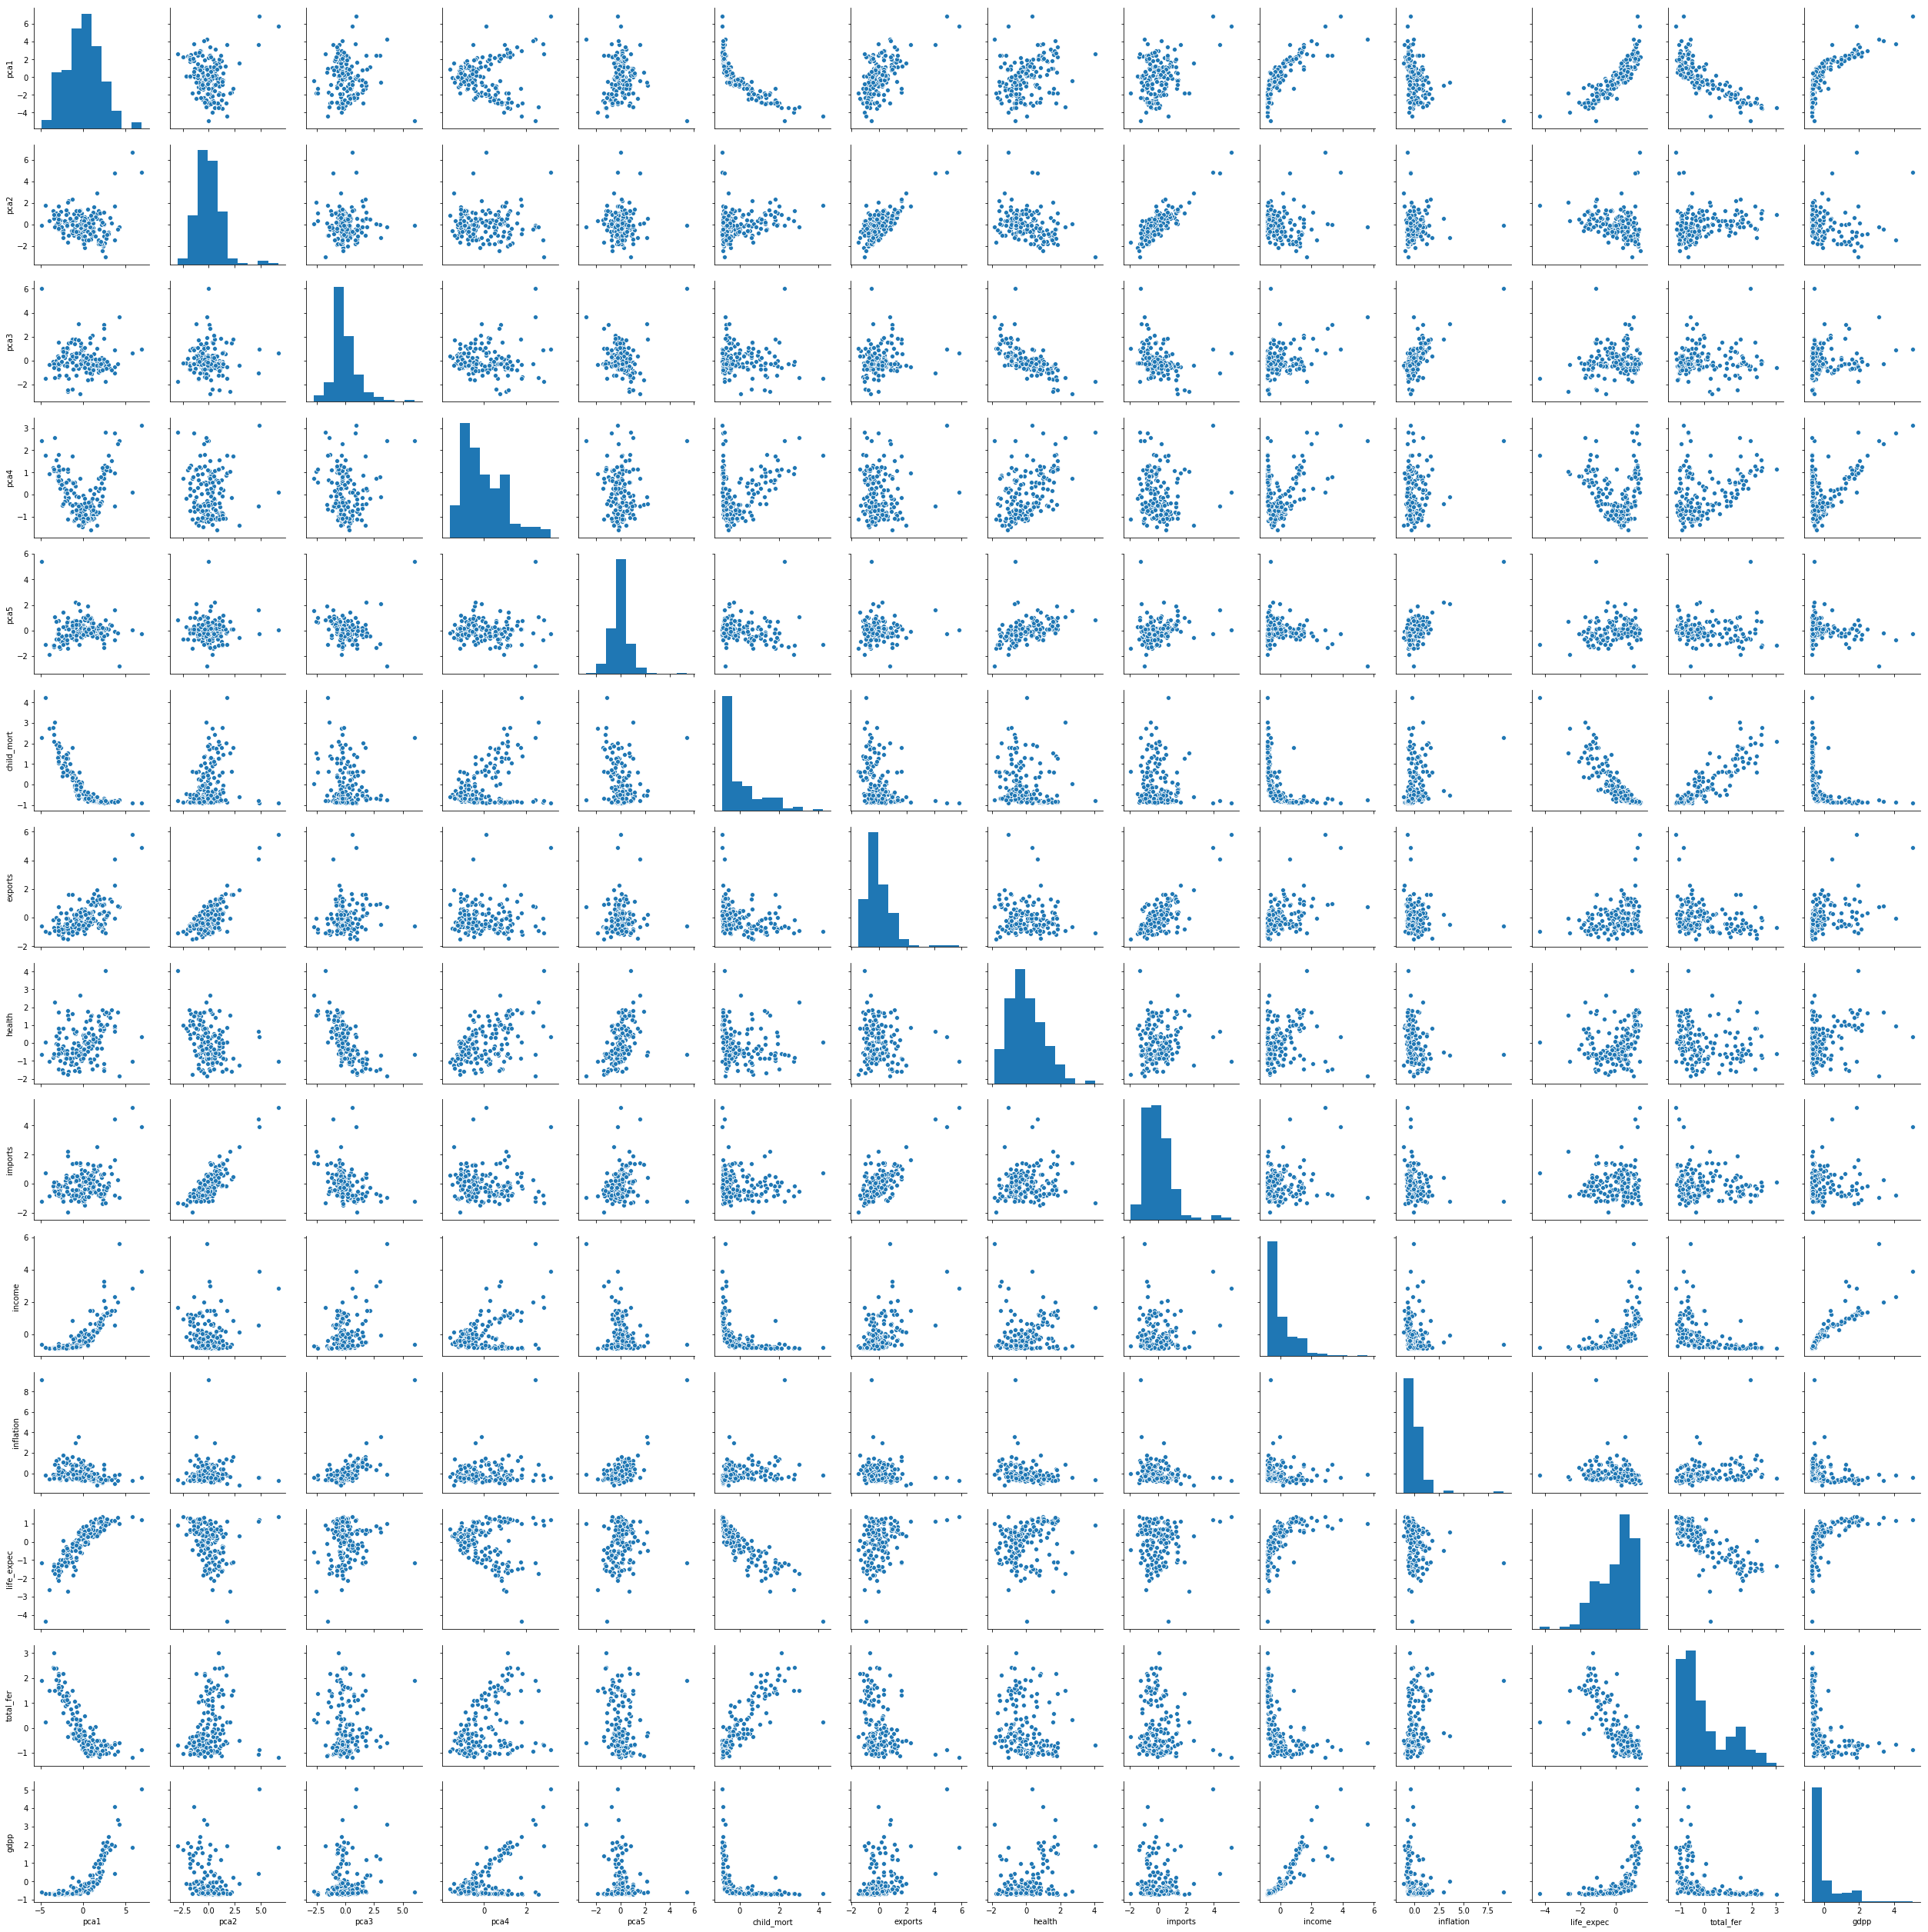

In [42]:
# pair poltting for new data frame which is pca and non-pca features
sns.pairplot(df_new)

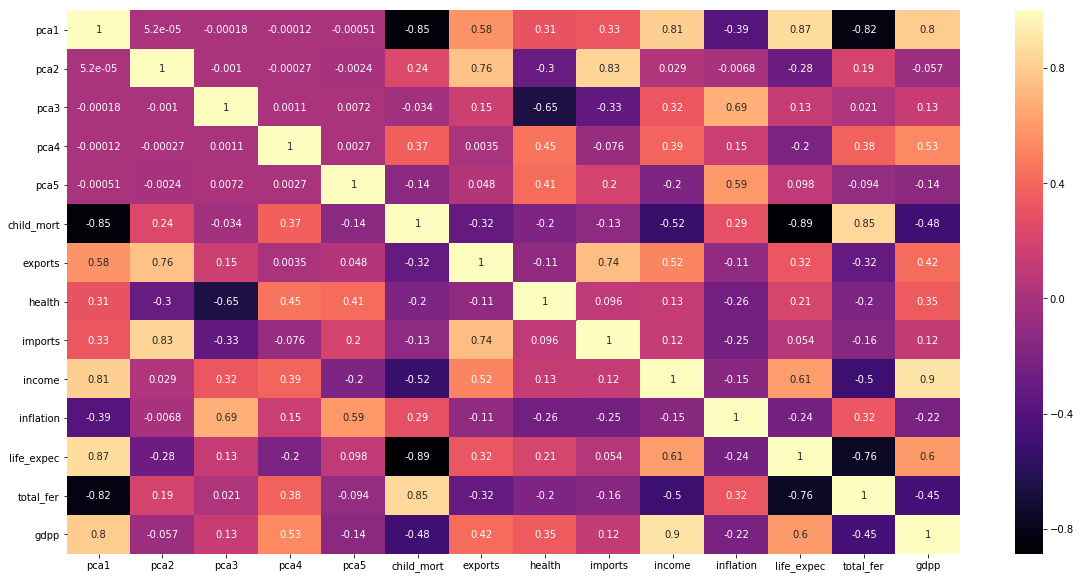

In [43]:
# correlation matrix 
plt.figure(figsize = (20, 10))
sns.heatmap(df_new.corr(), annot = True, cmap="magma")
plt.show()

In [44]:
#creating correlation matrix for the given data
corrmat = np.corrcoef(df_new.transpose())


In [45]:
#Make a diagonal matrix with diagonal entry of Matrix corrmat
p=np.diagflat(corrmat.diagonal())

In [46]:

# subtract diagonal entries making all diagonals 0
corrmat_diag_zero = corrmat - p
print("max corr:",corrmat_diag_zero.max(), ", min corr: ", corrmat_diag_zero.min(),)

max corr: 0.8955714330875313 , min corr:  -0.8866760973367769


In [47]:
# Retrieve the (i,j) index for which matrix has maximum value
ij_max = np.unravel_index(corrmat_diag_zero.argmax(), corrmat_diag_zero.shape)
print("ij_max",ij_max)
print("Maximum correlation :",corrmat_diag_zero[ij_max])

ij_max (9, 13)
Maximum correlation : 0.8955714330875313


In [48]:
# Retrieve the (i,j) index for which matrix has absolute minimum value
ij_min = np.unravel_index(np.absolute(corrmat).argmin(), corrmat.shape)
print("ij_min",ij_min)
print("Minimum correlation :",corrmat_diag_zero[ij_min])

ij_min (1, 0)
Minimum correlation : 5.2326727231515676e-05


# outlier treatment on pca (new data frame)

C:\Users\admin\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


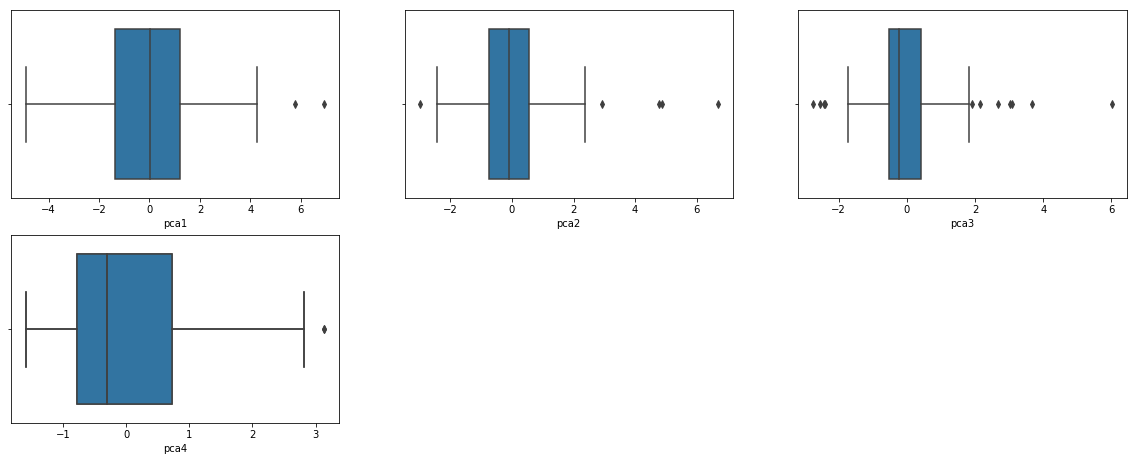

In [49]:
## Boxplots to visualize outliers on various principle components

plt.figure(figsize=(20, 20))
plt.subplot(5,3,1)
sns.boxplot(x = 'pca1', data = df_new)
plt.subplot(5,3,2)
sns.boxplot(x = 'pca2', data = df_new)
plt.subplot(5,3,3)
sns.boxplot(x = 'pca3', data = df_new)
plt.subplot(5,3,4)
sns.boxplot(x = 'pca4', data = df_new)
plt.subplot(5,3,4)
sns.boxplot(x = 'pca4', data = df_new)


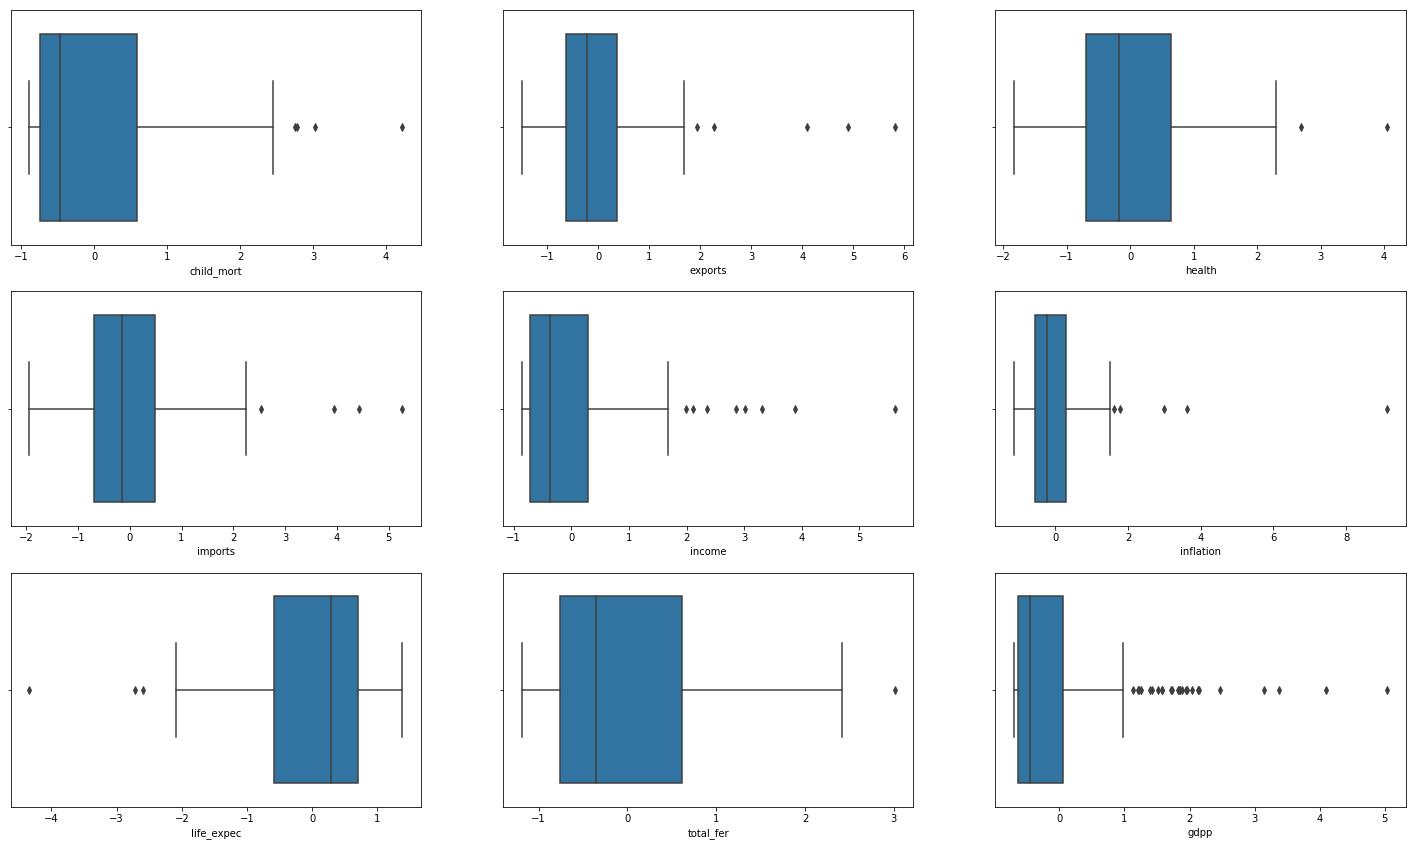

In [50]:
## Boxplots to visualize outliers on various original features
    
plt.figure(figsize=(25, 25))
plt.subplot(5,3,1)
sns.boxplot(x = 'child_mort', data = df_new)
plt.subplot(5,3,2)
sns.boxplot(x = 'exports', data = df_new)
plt.subplot(5,3,3)
sns.boxplot(x = 'health', data = df_new)
plt.subplot(5,3,4)
sns.boxplot(x = 'imports', data = df_new)
plt.subplot(5,3,5)
sns.boxplot(x = 'income', data = df_new)
plt.subplot(5,3,6)
sns.boxplot(x = 'inflation', data = df_new)
plt.subplot(5,3,7)
sns.boxplot(x = 'life_expec', data = df_new)
plt.subplot(5,3,8)
sns.boxplot(x = 'total_fer', data = df_new)
plt.subplot(5,3,9)
sns.boxplot(x = 'gdpp', data = df_new)  

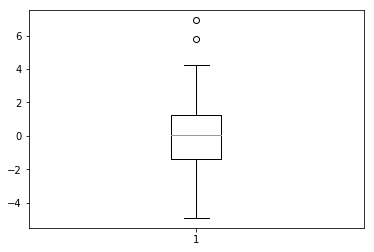

In [51]:
# outlier treatment for pca1

plt.boxplot(df_new.pca1)
Q11 = df_new.pca1.quantile(0.25)
Q31 = df_new.pca1.quantile(0.75)
IQR1 = Q31 - Q11
out1 = df_new[(df_new.pca1 < (Q11 - 1.5 * IQR1)) | (df_new.pca1 > (Q31 + 1.5 * IQR1))]
df_new1 = df_new[(df_new.pca1 > (Q11 - 1.5 * IQR1)) & (df_new.pca1 < (Q31 + 1.5 * IQR1))]


{'whiskers': [<matplotlib.lines.Line2D at 0x992ad86b38>,
 'caps': [<matplotlib.lines.Line2D at 0x992ad86f60>,
 'boxes': [<matplotlib.lines.Line2D at 0x992ad86748>],
 'medians': [<matplotlib.lines.Line2D at 0x992ad90860>],
 'fliers': [<matplotlib.lines.Line2D at 0x992ad90ba8>],
 'means': []}

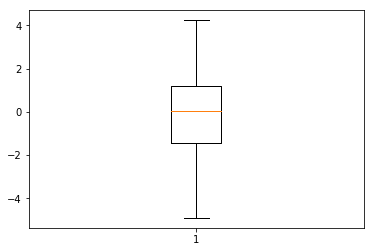

In [52]:
plt.boxplot(df_new1.pca1)

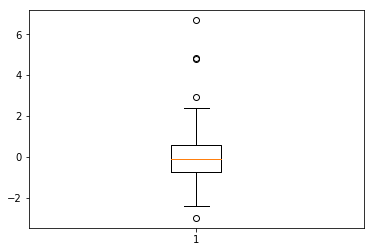

In [53]:
# outlier handling on pca2
plt.boxplot(df_new.pca2)
Q12 = df_new1.pca2.quantile(0.25)
Q32 = df_new1.pca2.quantile(0.75)
IQR2 = Q32 - Q12
out2 = df_new1[(df_new1.pca2 < (Q12 - 1.5 * IQR2)) | (df_new1.pca2 > (Q32 + 1.5 * IQR2))]
df_new2 = df_new1[(df_new1.pca2 > (Q12 - 1.5 * IQR2)) & (df_new1.pca2 < (Q32 + 1.5 * IQR2))]

{'whiskers': [<matplotlib.lines.Line2D at 0x991ee8cef0>,
 'caps': [<matplotlib.lines.Line2D at 0x991ee94898>,
 'boxes': [<matplotlib.lines.Line2D at 0x991ee8cda0>],
 'medians': [<matplotlib.lines.Line2D at 0x991ee94eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x991ee94f98>],
 'means': []}

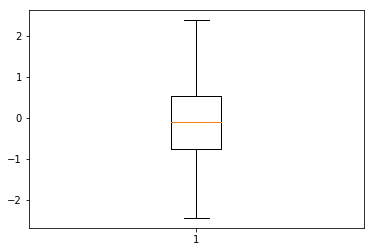

In [54]:

plt.boxplot(df_new2.pca2)

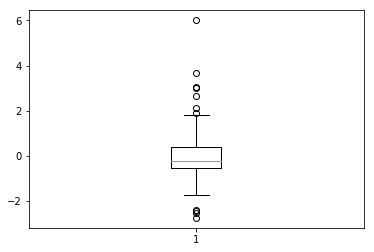

In [55]:
# outliers handling on pca3 column
plt.boxplot(df_new.pca3)
Q13 = df_new2.pca3.quantile(0.25)
Q33 = df_new2.pca3.quantile(0.75)
IQR3 = Q33 - Q13
out3 = df_new2[(df_new2.pca3 < (Q13 - 1.5 * IQR3)) | (df_new2.pca3 > (Q33 + 1.5 * IQR3))]
df_new3 = df_new2[(df_new2.pca3 > (Q13 - 1.5 * IQR3)) & (df_new2.pca3 < (Q33 + 1.5 * IQR3))]

{'whiskers': [<matplotlib.lines.Line2D at 0x991ef3b780>,
 'caps': [<matplotlib.lines.Line2D at 0x991ef3be10>,
 'boxes': [<matplotlib.lines.Line2D at 0x991ef3b390>],
 'medians': [<matplotlib.lines.Line2D at 0x991ef474e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x991ef47828>],
 'means': []}

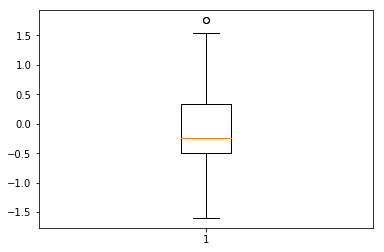

In [56]:
plt.boxplot(df_new3.pca3)

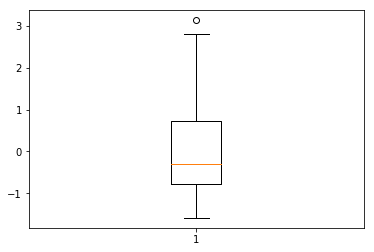

In [57]:
# outliers handling on pca4
plt.boxplot(df_new.pca4)
Q14 = df_new3.pca4.quantile(0.25)
Q34 =df_new3.pca4.quantile(0.75)
IQR4 = Q34 - Q14
out4 = df_new3[(df_new3.pca4 < (Q14 - 1.5 * IQR4)) | (df_new3.pca4 > (Q34 + 1.5 * IQR4))]
df_new4 = df_new3[(df_new3.pca4 > (Q14 - 1.5 * IQR4)) & (df_new3.pca4 < (Q34 + 1.5 * IQR4))]

{'whiskers': [<matplotlib.lines.Line2D at 0x991eff07f0>,
 'caps': [<matplotlib.lines.Line2D at 0x991eff0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x991eff03c8>],
 'medians': [<matplotlib.lines.Line2D at 0x991ef5b588>],
 'fliers': [<matplotlib.lines.Line2D at 0x991eff9860>],
 'means': []}

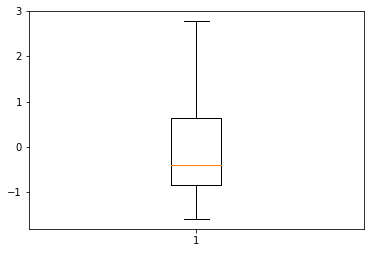

In [58]:
plt.boxplot(df_new4.pca4)

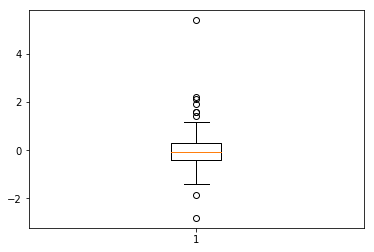

In [59]:
# outliers handling on pca5
plt.boxplot(df_new.pca5)
Q15 = df_new4.pca5.quantile(0.25)
Q35 =df_new4.pca5.quantile(0.75)
IQR5 = Q35 - Q15
out5 = df_new4[(df_new4.pca5 < (Q14 - 1.5 * IQR4)) | (df_new4.pca5 > (Q34 + 1.5 * IQR4))]
df_new5 = df_new4[(df_new4.pca5 > (Q14 - 1.5 * IQR4)) & (df_new4.pca5 < (Q34 + 1.5 * IQR4))]


{'whiskers': [<matplotlib.lines.Line2D at 0x992ae75668>,
 'caps': [<matplotlib.lines.Line2D at 0x992ae75cf8>,
 'boxes': [<matplotlib.lines.Line2D at 0x992ae75240>],
 'medians': [<matplotlib.lines.Line2D at 0x992ae813c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x992ae81710>],
 'means': []}

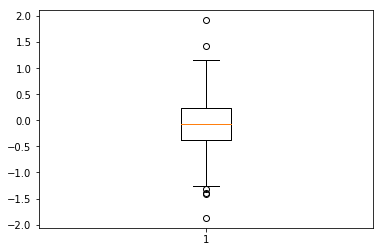

In [60]:
plt.boxplot(df_new5.pca5)

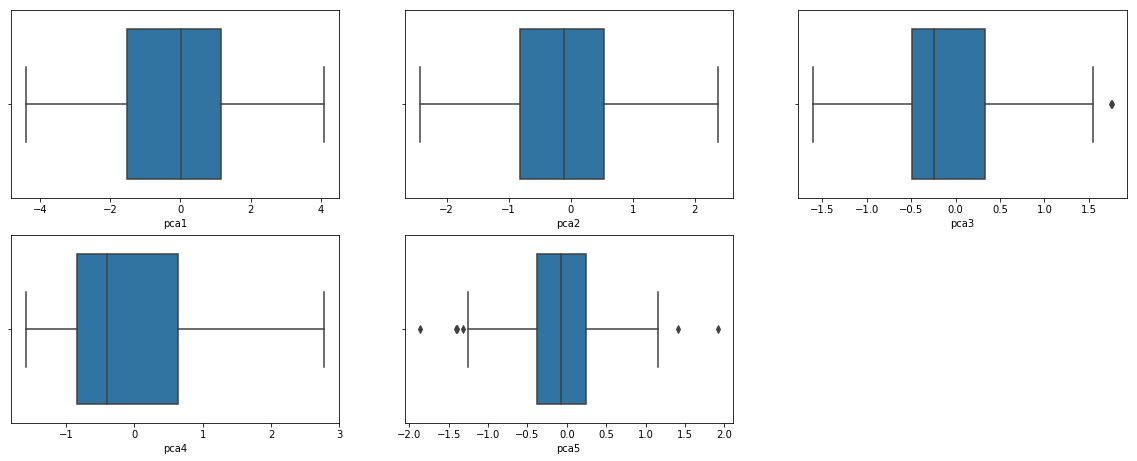

In [61]:
# plot Boxplots again to check if outliers still exist

plt.figure(figsize=(20, 20))

plt.subplot(5,3,1)
sns.boxplot(x = 'pca1', data = df_new5)

plt.subplot(5,3,2)
sns.boxplot(x = 'pca2', data = df_new5)

plt.subplot(5,3,3)
sns.boxplot(x = 'pca3', data = df_new5)

plt.subplot(5,3,4)
sns.boxplot(x = 'pca4', data = df_new5)

plt.subplot(5,3,5)
sns.boxplot(x = 'pca5', data = df_new5)

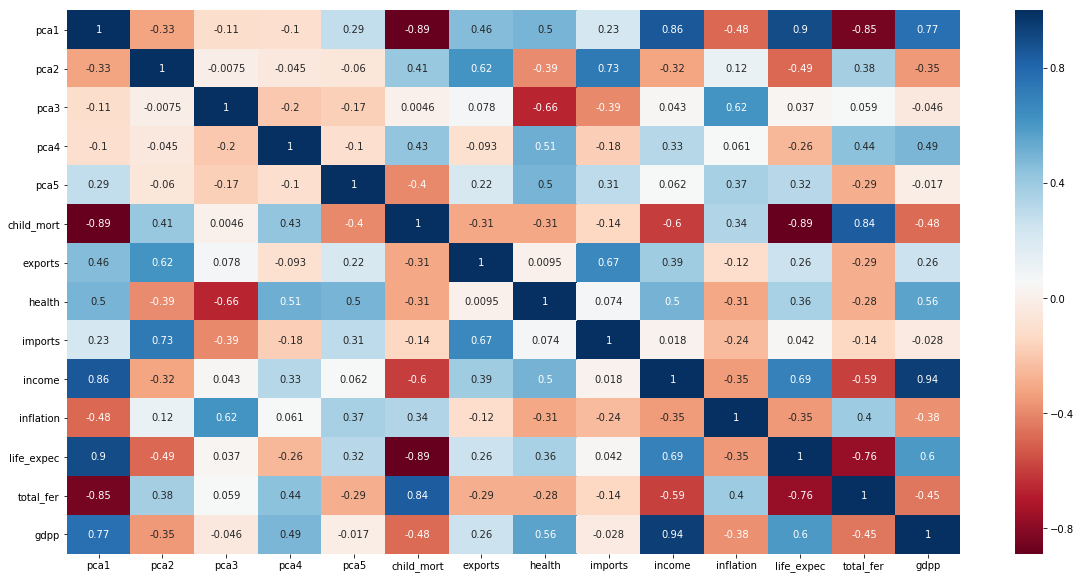

In [62]:
# outliers reduced to some what
#heatmap again to determine the correlation between each principle components and features

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


plt.figure(figsize = (20,10)) 
sns.heatmap(df_new5.corr(),annot = True,cmap="RdBu")

In [63]:
#correlation matrix
df_new5.corr()

pca1      pca2      pca3      pca4      pca5  child_mort  \
pca1        1.000000 -0.326595 -0.110938 -0.101836  0.289258   -0.885899   
pca2       -0.326595  1.000000 -0.007513 -0.045145 -0.060288    0.412335   
pca3       -0.110938 -0.007513  1.000000 -0.195572 -0.167382    0.004552   
pca4       -0.101836 -0.045145 -0.195572  1.000000 -0.104307    0.428041   
pca5        0.289258 -0.060288 -0.167382 -0.104307  1.000000   -0.398444   
child_mort -0.885899  0.412335  0.004552  0.428041 -0.398444    1.000000   
exports     0.461708  0.616608  0.077854 -0.093301  0.216166   -0.306614   
health      0.496037 -0.390754 -0.660912  0.514125  0.497848   -0.312209   
imports     0.225456  0.728538 -0.394194 -0.179340  0.305607   -0.139490   
income      0.855971 -0.320133  0.043283  0.327708  0.062106   -0.600346   
inflation  -0.484836  0.119774  0.622291  0.060550  0.369375    0.343029   
life_expec  0.897227 -0.487546  0.036985 -0.259359  0.315955   -0.888228   
total_fer  -0.848604  0.379678  0.059200  0.441359 -0.290291    0.844376   
gdpp        0.768175 -0.353954 -0.045934  0.488114 -0.017218   -0.481455   

             exports    health   imports    income  inflation  life_expec  \
pca1        0.461708  0.496037  0.225456  0.855971  -0.484836    0.897227   
pca2        0.616608 -0.390754  0.728538 -0.320133   0.119774   -0.487546   
pca3        0.077854 -0.660912 -0.394194  0.043283   0.622291    0.036985   
pca4       -0.093301  0.514125 -0.179340  0.327708   0.060550   -0.259359   
pca5        0.216166  0.497848  0.305607  0.062106   0.369375    0.315955   
child_mort -0.306614 -0.312209 -0.139490 -0.600346   0.343029   -0.888228   
exports     1.000000  0.009499  0.665636  0.394408  -0.115834    0.259573   
health      0.009499  1.000000  0.074391  0.504231  -0.312610    0.361790   
imports     0.665636  0.074391  1.000000  0.017793  -0.242733    0.041568   
income      0.394408  0.504231  0.017793  1.000000  -0.349227    0.691387   
inflation  -0.115834 -0.312610 -0.242733 -0.349227   1.000000   -0.354498   
life_expec  0.259573  0.361790  0.041568  0.691387  -0.354498    1.000000   
total_fer  -0.289218 -0.284634 -0.136282 -0.586997   0.398871   -0.764676   
gdpp        0.260143  0.560395 -0.028243  0.942500  -0.377625    0.600744   

            total_fer      gdpp  
pca1        -0.848604  0.768175  
pca2         0.379678 -0.353954  
pca3         0.059200 -0.045934  
pca4         0.441359  0.488114  
pca5        -0.290291 -0.017218  
child_mort   0.844376 -0.481455  
exports     -0.289218  0.260143  
health      -0.284634  0.560395  
imports     -0.136282 -0.028243  
income      -0.586997  0.942500  
inflation    0.398871 -0.377625  
life_expec  -0.764676  0.600744  
total_fer    1.000000 -0.451039  
gdpp        -0.451039  1.000000

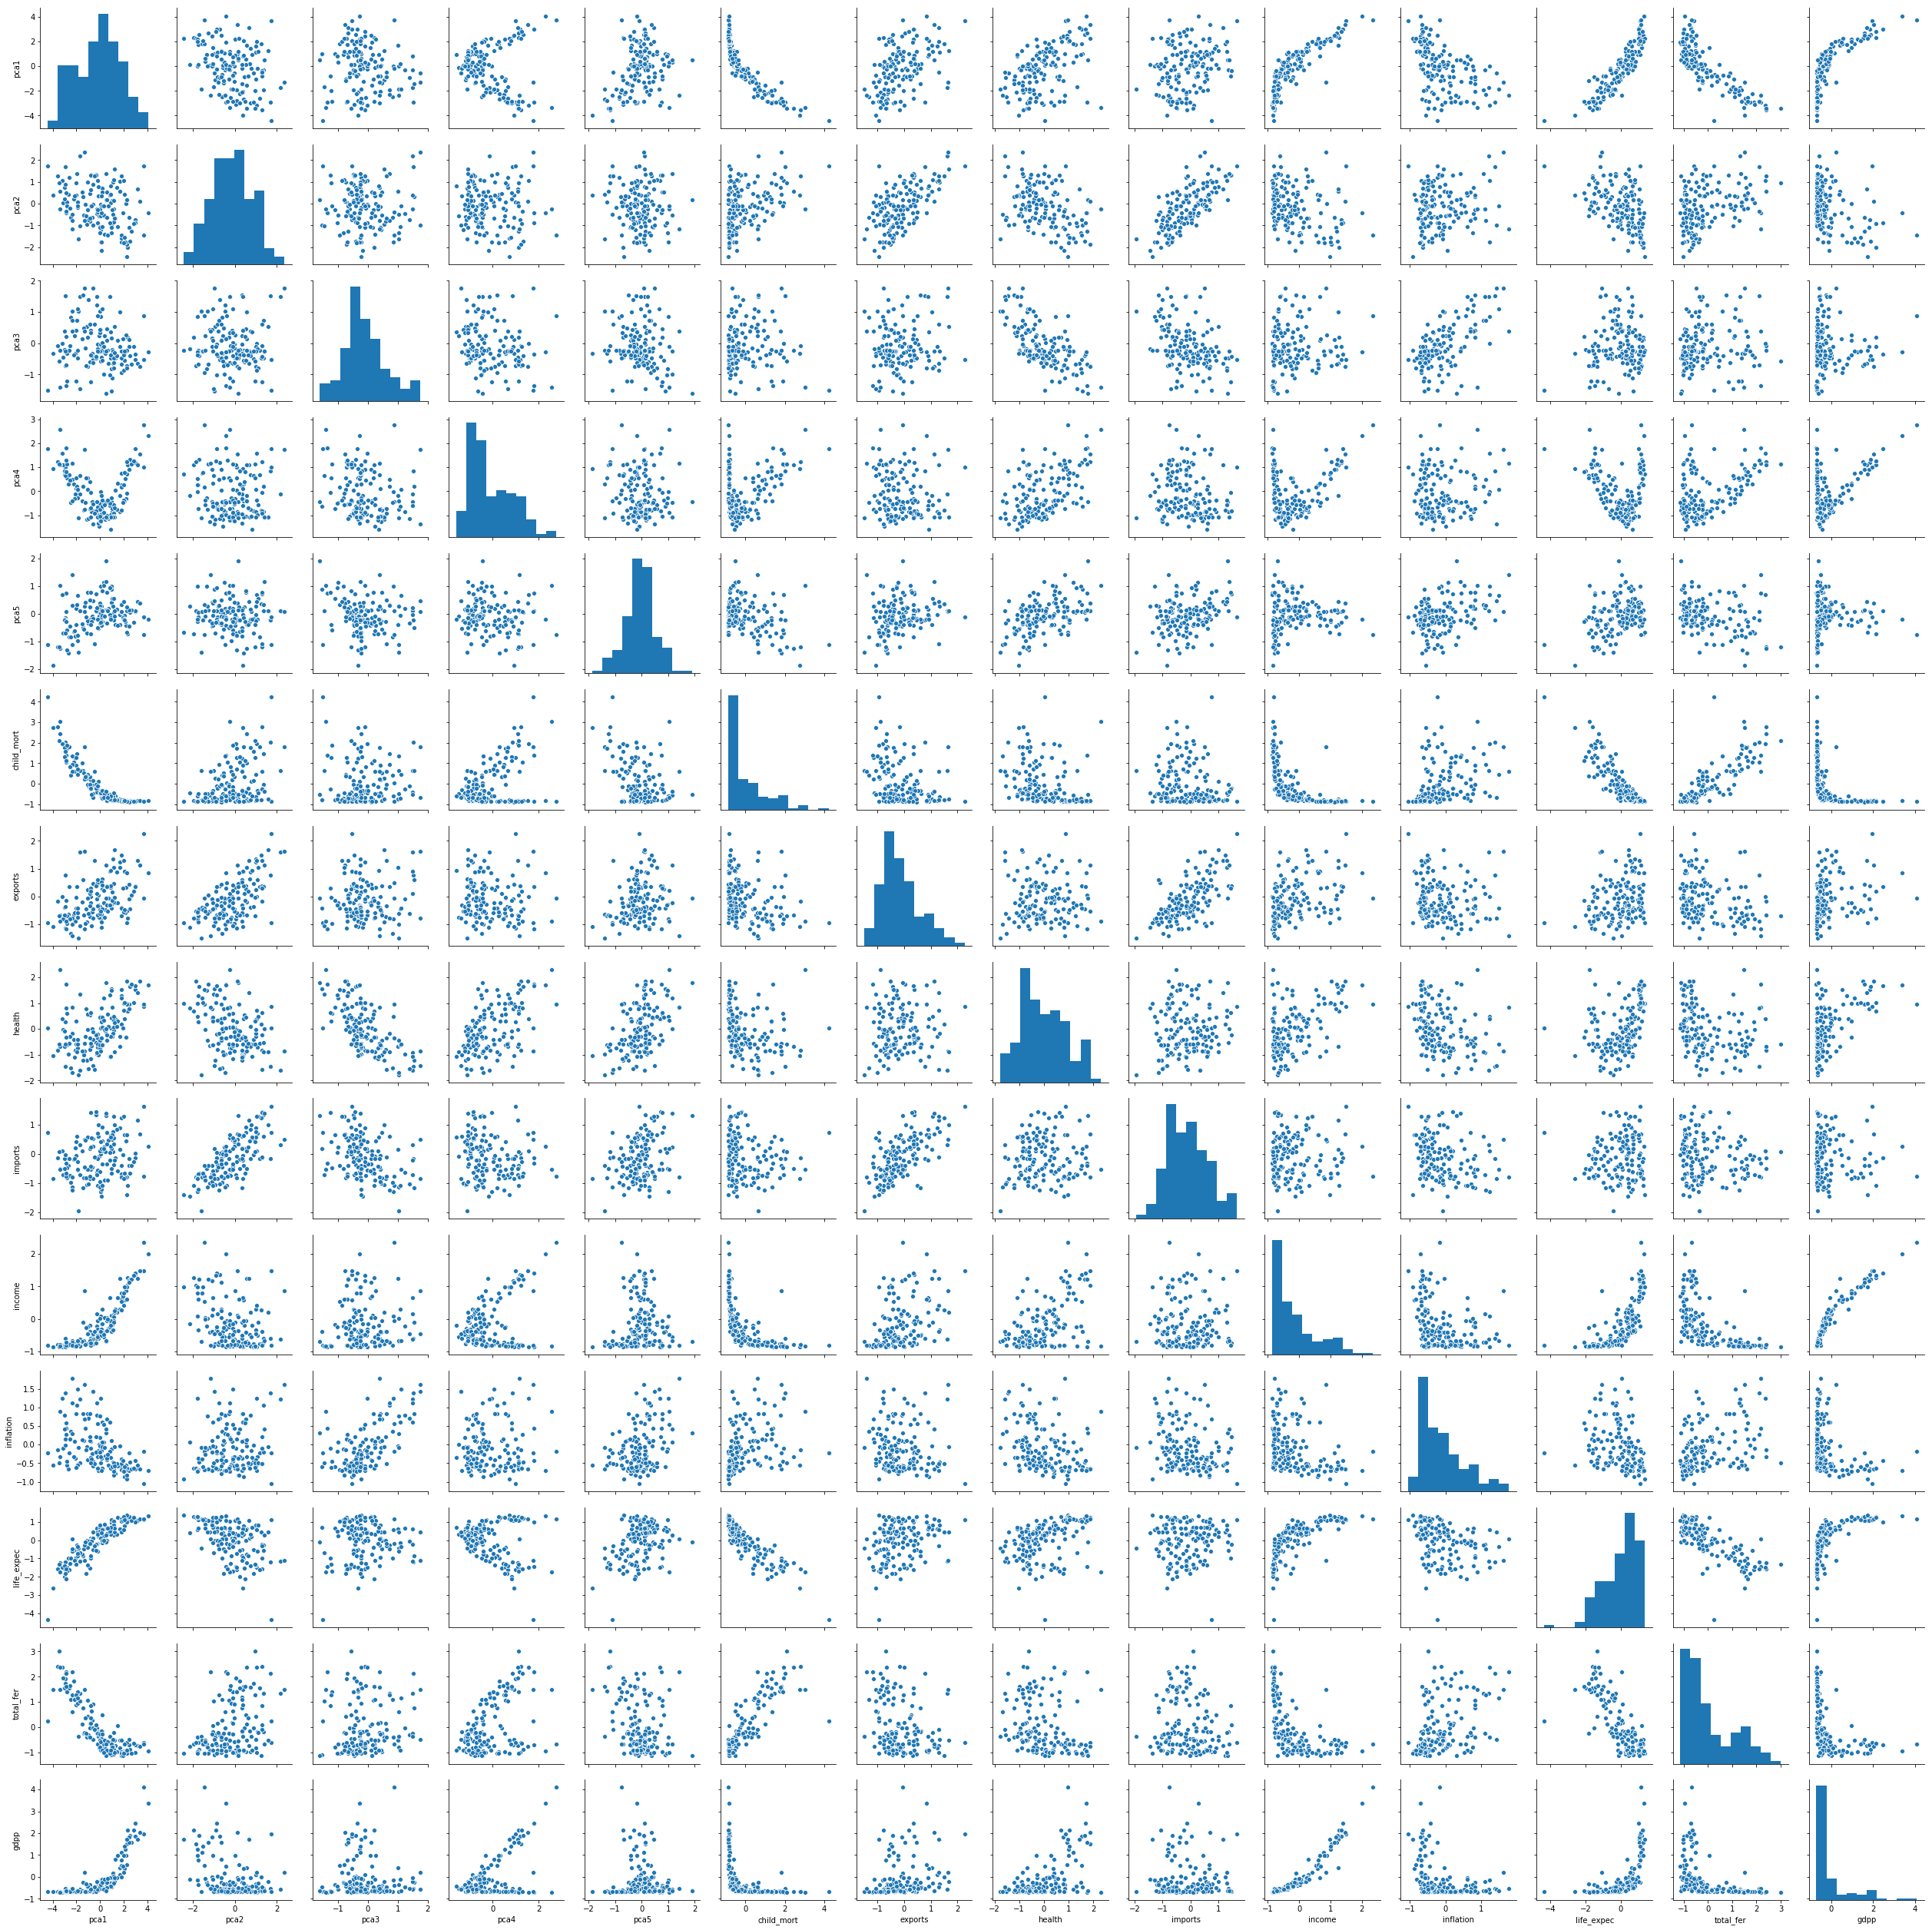

In [64]:
#draw pairplots also to see if any visible patterns

sns.pairplot(df_new5)

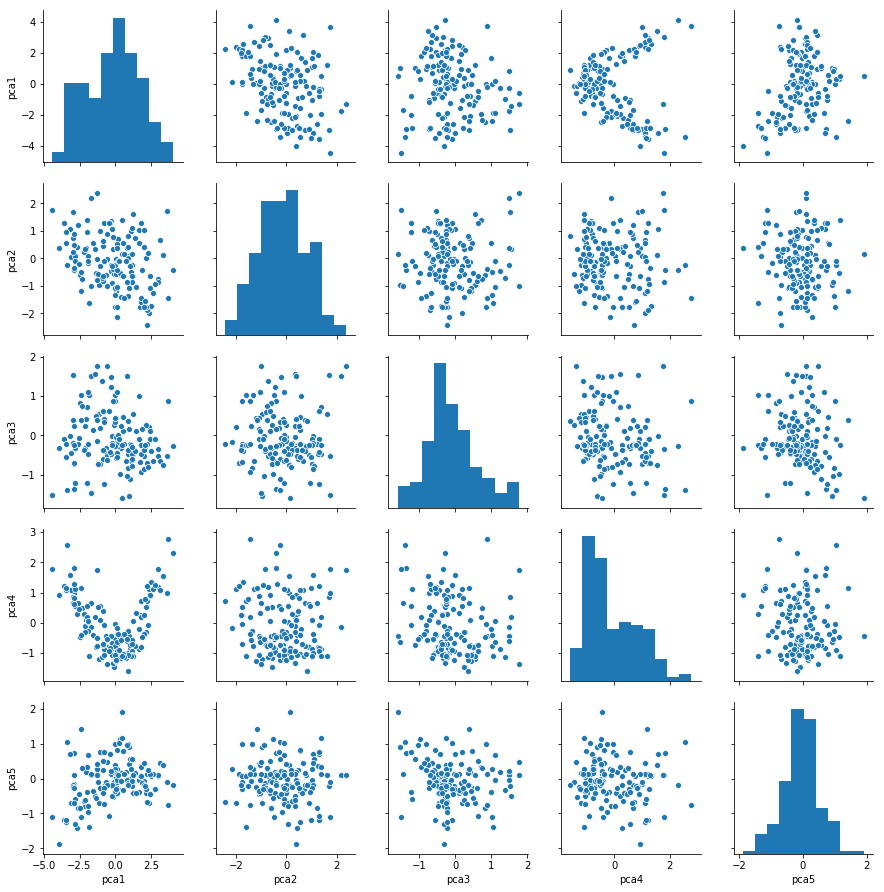

In [65]:
sns.pairplot(df_new5[['pca1','pca2','pca3','pca4','pca5']])

# Buliding Clustering

In [66]:
#filtering out the pc's features alone which are required to cluster

cls_cont = df_new5[['pca1','pca2','pca3','pca4','pca5']]

# Hopkinson's score

In [67]:
# function to calculate Hopkinson's score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [68]:
## Let's claculate hopkinson score for our clustering dataset

hopkins(cls_cont)

0.6823677303937237

#### 75% is very good and we can conclude that our dataset is having good tendency to form clusters

# silhoutte Analysis

### Let's calculate silhoutte scores for various no.of clusters and let's draw them on a graph


In [71]:
# To Scale our data
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [77]:
# To perform Hierarchical clustering

from sklearn.metrics import silhouette_score
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(cls_cont)
    sse_.append([k, silhouette_score(cls_cont, kmeans.labels_)])

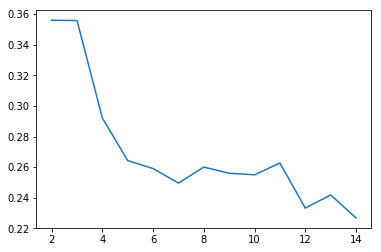

In [78]:
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1]);

#### From the figure we can say that at k = 3 and we can conlude that k=3 will be good coefficient for clustering

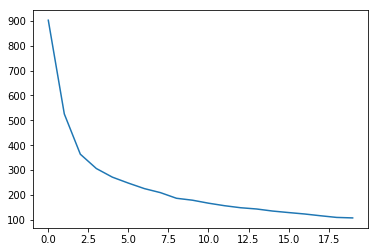

In [79]:
## Let's also see elbow curve to conclude that sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    modelclus = KMeans(n_clusters = num_clusters, max_iter=50)
    modelclus.fit(cls_cont)
    ssd.append(modelclus.inertia_)

plt.plot(ssd)

####  elbow curve also showing k=3 for clustering

# K- Means clustering

In [80]:
# Let's try kmeans algorithm on our dataset with K=3 first
model_cluster3 = KMeans(n_clusters = 3, max_iter=100)
model_cluster3.fit(cls_cont)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [81]:
# clustering labels assigned for each row of our dataset
model_cluster3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1, 1,
       2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2, 0,
       2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 2, 0, 0])

#### Now let's add country name to the dataset which occured after removal of outliers, The dataset which contains all the Principle components and NON Principle components columns

In [82]:
y = list(df_new5.index)
z =C_DF.iloc[y,:].country
df_new6 = pd.concat([z,df_new5],axis=1)
df_new6.head()

country      pca1      pca2      pca3      pca4      pca5  \
0          afghanistan -2.913000  0.091969 -0.721242  1.001838 -0.146765   
1              albania  0.429870 -0.589373 -0.328611 -1.165014  0.153205   
2              algeria -0.285289 -0.452139  1.232051 -0.857767  0.191227   
3               angola -2.932714  1.698771  1.525076  0.855595 -0.214778   
4  antigua and barbuda  1.033371  0.133853 -0.216699 -0.846638 -0.193186   

   child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -1.138280  0.279088 -0.082455 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.479658 -0.097016  0.070837 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.099122 -0.966073 -0.641762 -0.220844   0.789274    0.670423   
3    2.007808  0.775381 -1.448071 -0.165315 -0.585043   1.387054   -1.179234   
4   -0.695634  0.160668 -0.286894  0.497568  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

### analysis of clusters

#### Now let's add cluster id to each record of our given original dataset, after adding clusterID then calculate mean of all features by partitioning based on clusterID


In [83]:

df_new6.index = pd.RangeIndex(len(df_new6.index))
df_new6_km = pd.concat([df_new6, pd.Series(model_cluster3.labels_)], axis=1)
df_new6_km.columns = ['Country', 'pca1', 'pca2', 'pca3','pca4','pca5', 'child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

clust_pca1 = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).pca1.mean())
clust_pca2 = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).pca2.mean())
clust_pca3 = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).pca3.mean())
clust_pca4 = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).pca4.mean())
clust_pca5 = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).pca5.mean())
clust_child_mort = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).child_mort.mean())
clust_exports = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).exports.mean())
clust_health = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).health.mean())
clust_imports = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).imports.mean())
clust_income = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).income.mean())
clust_inflation = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).inflation.mean())
clust_life_expec = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).life_expec.mean())
clust_total_fer = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).total_fer.mean())
clust_gdpp = 	pd.DataFrame(df_new6_km.groupby(["ClusterID"]).gdpp.mean())

In [84]:
data_frame = pd.concat([pd.Series([0,1,2]), clust_pca1,clust_pca2,clust_pca3,clust_pca4,clust_pca5,clust_child_mort,clust_exports,clust_health,clust_imports,clust_income,clust_inflation,clust_life_expec,clust_total_fer,clust_gdpp], axis=1)
data_frame.columns = ["ClusterID", "pca1_mean","pca2_mean","pca3_mean","pca4_mean","pca5_mean","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
data_frame.head()

ClusterID  pca1_mean  pca2_mean  pca3_mean  pca4_mean  pca5_mean  \
0          0  -2.421398   0.324802  -0.052361   0.596642  -0.353755   
1          1   2.468969  -0.901149  -0.304228   0.819821  -0.114772   
2          2   0.221457  -0.133875  -0.050173  -0.797680   0.123140   

   child_mort_mean  exports_mean  health_mean  imports_mean  income_mean  \
0         1.338504     -0.445464    -0.306479     -0.343497    -0.680287   
1        -0.841634      0.107545     1.054423     -0.197846     1.075241   
2        -0.424321     -0.010846    -0.195934      0.041304    -0.268537   

   inflation_mean  life_expec_mean  total_fer_mean  gdpp_mean  
0        0.246755        -1.241522        1.356425  -0.602454  
1       -0.626479         1.117800       -0.792245   1.561171  
2       -0.103059         0.278137       -0.453521  -0.369340

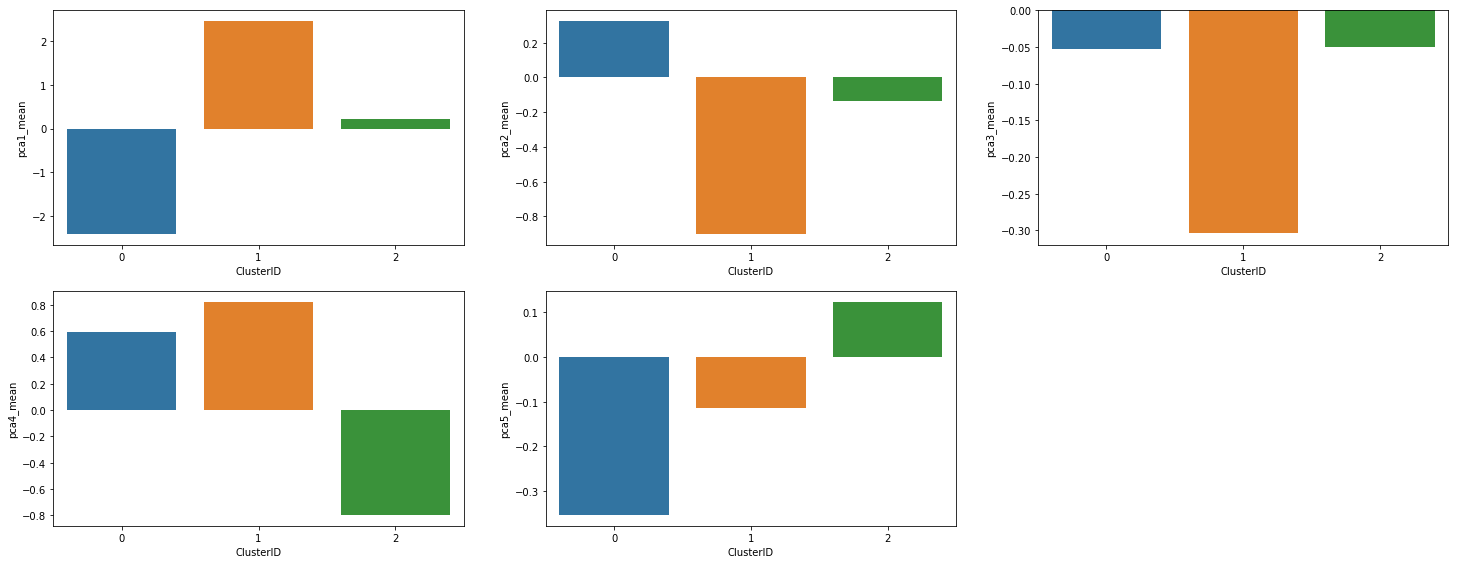

In [85]:
#plotting Barplots of means of pc's clusterwise

plt.figure(figsize=(25, 25))
plt.subplot(5,3,1)
sns.barplot(x=data_frame.ClusterID, y=data_frame.pca1_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame.ClusterID, y=data_frame.pca2_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame.ClusterID, y=data_frame.pca3_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame.ClusterID, y=data_frame.pca4_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame.ClusterID, y=data_frame.pca5_mean)

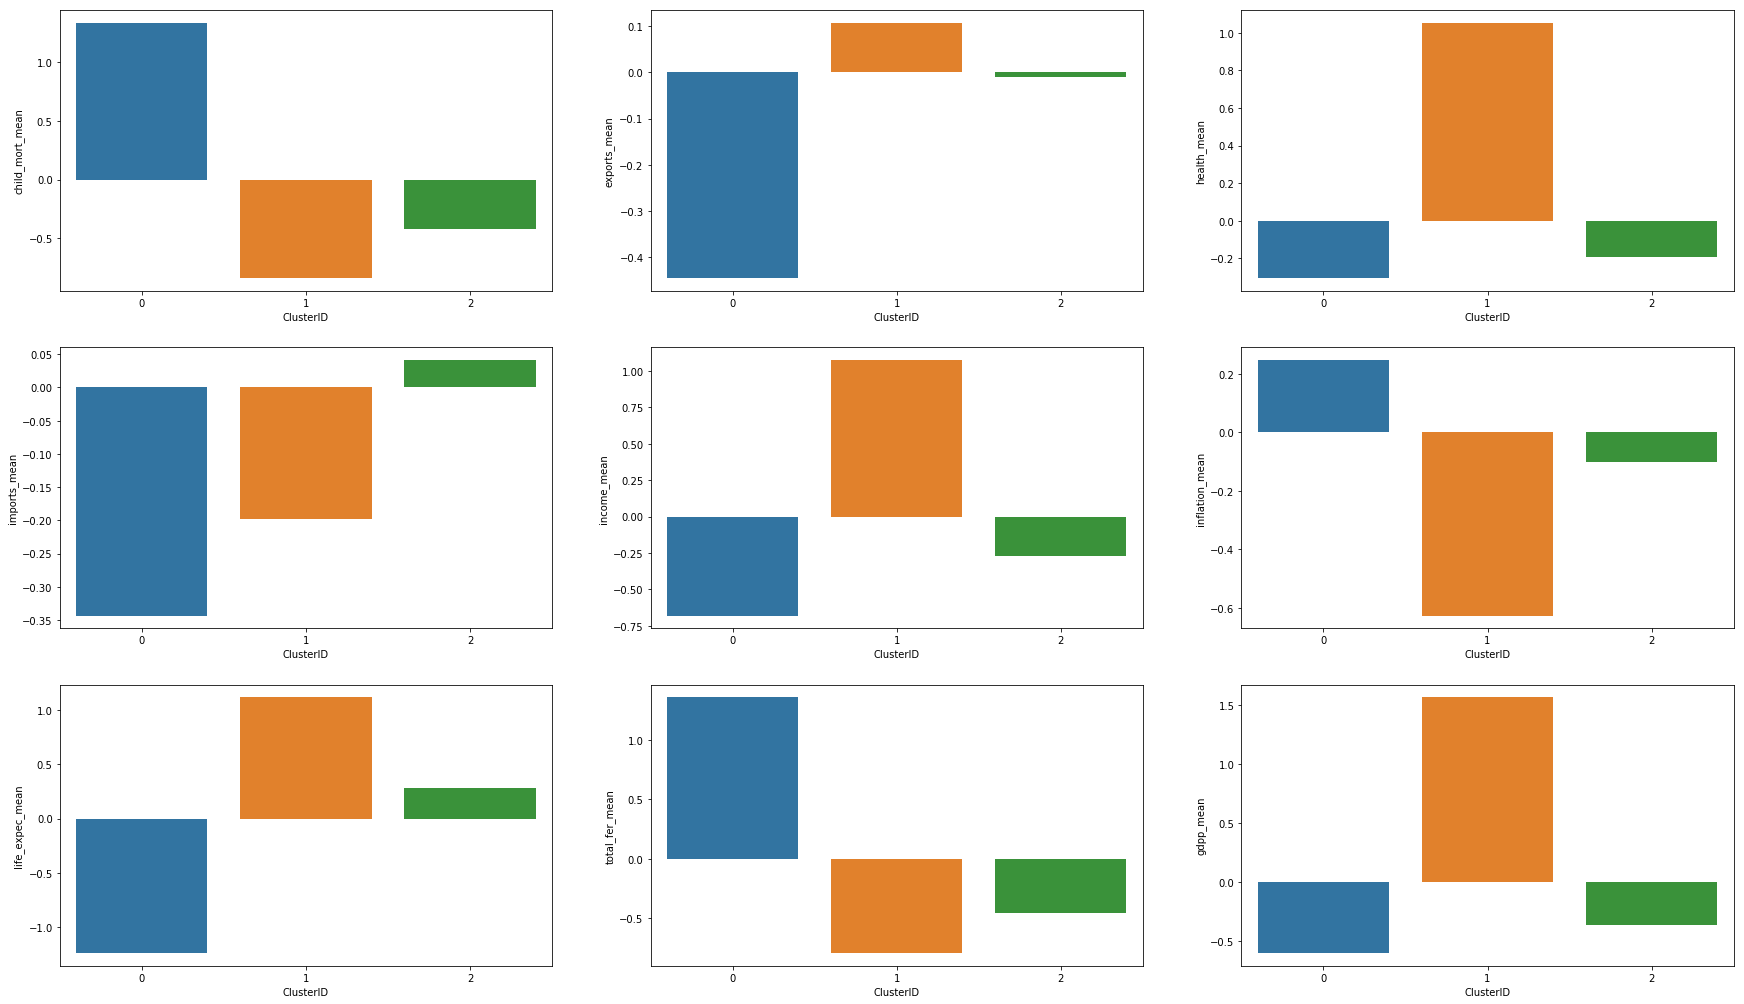

In [86]:
# Barplots of means of original features too by clusterwise

plt.figure(figsize=(30, 30))
plt.subplot(5,3,1)
sns.barplot(x=data_frame.ClusterID,y=data_frame.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame.ClusterID,y=data_frame.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame.ClusterID,y=data_frame.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame.ClusterID,y=data_frame.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame.ClusterID,y=data_frame.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=data_frame.ClusterID,y=data_frame.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=data_frame.ClusterID,y=data_frame.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=data_frame.ClusterID,y=data_frame.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=data_frame.ClusterID,y=data_frame.gdpp_mean)

### After observing bar plots of principle components and original features the following observations/conclusions obtained:

#### #1. principle component-1  has very low for cluster_id-1 which means that Cluster-1 has low- income,low-gdpp, high-child_mort and high-fert_rate.

#### #2. principle component - 3 has little high for cluster_id-1 compared to cluster-2 which means that cluster-1 ia having high-inflation & low-health

##### So cluster_id-1 here needs more aid from the foundation

In [87]:
# dig it out countries which falls under cluster-1
df_new6_km[df_new6_km.ClusterID == 1].head()

Country      pca1      pca2      pca3      pca4      pca5  child_mort  \
7   australia  2.342153 -1.989710  0.198795  1.113413 -0.710654   -0.832423   
8     austria  2.973841 -0.735152 -0.528284  1.201101  0.080167   -0.844858   
10    bahamas  1.268740 -0.658658 -0.484555  0.053945 -0.398859   -0.608587   
15    belgium  3.143756  0.662482 -0.659855  1.087644  0.445979   -0.839884   
28     canada  2.543776 -1.727357 -0.401760  1.334434  0.070455   -0.812526   

     exports    health   imports    income  inflation  life_expec  total_fer  \
7  -0.779697  0.699011 -1.076779  1.261966  -0.628316    1.290735  -0.674457   
8   0.372890  1.527901  0.037693  1.355617  -0.655549    1.121559  -0.999109   
10 -0.223528  0.392285 -0.132171  0.299440  -0.775674    0.365906  -0.720836   
15  1.291301  1.418356  1.152164  1.246357  -0.559999    1.065167  -0.720836   
28 -0.439409  1.637446 -0.658334  1.225546  -0.466062    1.211786  -0.873224   

        gdpp  ClusterID  
7   2.130699          1  
8   1.857082          1  
10  0.822811          1  
15  1.720274          1  
28  1.884444          1

In [88]:
# try with k = 4 ( kmeans with 4 clusters) for the above steps
# Kmeans with K=4
model_clust4 = KMeans(n_clusters = 4, max_iter=100)
model_clust4.fit(cls_cont)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [89]:
model_clust4.labels_

array([0, 2, 1, 0, 2, 1, 1, 3, 3, 1, 2, 2, 1, 2, 2, 3, 2, 0, 2, 1, 2, 0,
       1, 2, 0, 0, 2, 0, 3, 1, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 2, 3,
       1, 1, 1, 1, 0, 0, 2, 2, 3, 3, 0, 0, 2, 3, 0, 3, 1, 1, 0, 0, 2, 0,
       2, 3, 1, 1, 1, 1, 3, 3, 3, 1, 3, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 1, 0, 1, 0, 1, 3, 3, 0, 3, 0, 2, 2, 1, 1,
       2, 3, 1, 1, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 3, 1, 1, 0, 1, 3, 3, 1,
       0, 2, 0, 0, 1, 2, 1, 1, 0, 2, 3, 1, 1, 1, 2, 0, 0])

In [90]:
# analysis of clusters formed


df_new7 = df_new6
df_new7.index = pd.RangeIndex(len(df_new7.index))
df_new7_km = pd.concat([df_new6, pd.Series(model_clust4.labels_)], axis=1)
df_new7_km.columns = ['Country', 'pca1', 'pca2', 'pca3','pca4','pca5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']


clustk_pca1 = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).pca1.mean())
clustk_pca2 = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).pca2.mean())
clustk_pca3 = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).pca3.mean())
clustk_pca4 = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).pca4.mean())
clustk_pca5 = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).pca5.mean())
clustk_child_mort = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).child_mort.mean())
clustk_exports = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).exports.mean())
clustk_health = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).health.mean())
clustk_imports = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).imports.mean())
clustk_income = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).income.mean())
clustk_inflation = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).inflation.mean())
clustk_life_expec = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).life_expec.mean())
clustk_total_fer = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).total_fer.mean())
clustk_gdpp = 	pd.DataFrame(df_new7_km.groupby(["ClusterID"]).gdpp.mean())

In [91]:
data_frame1 = pd.concat([pd.Series([0,1,2,3]), clustk_pca1,clustk_pca2,clustk_pca3,clustk_pca4,clustk_pca5,clustk_child_mort,clustk_exports,clustk_health,clustk_imports,clustk_income,clustk_inflation,clustk_life_expec,clustk_total_fer,clustk_gdpp], axis=1)
data_frame1.columns = ["ClusterID", "pca1_mean","pca2_mean","pca3_mean","pca4_mean","pca5_mean","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
data_frame1.head()

ClusterID  pca1_mean  pca2_mean  pca3_mean  pca4_mean  pca5_mean  \
0          0  -2.468456   0.385370  -0.083990   0.638018  -0.355725   
1          1  -0.372785  -0.628298   0.308396  -0.777640  -0.099752   
2          2   0.866938   0.273740  -0.365467  -0.730487   0.270860   
3          3   2.589482  -1.084266  -0.308810   1.061327  -0.105331   

   child_mort_mean  exports_mean  health_mean  imports_mean  income_mean  \
0         1.387581     -0.429469    -0.292806     -0.301048    -0.690546   
1        -0.241807     -0.467868    -0.504524     -0.532940    -0.377606   
2        -0.597091      0.410619     0.114933      0.526108    -0.082865   
3        -0.848363      0.033268     1.227648     -0.315782     1.181322   

   inflation_mean  life_expec_mean  total_fer_mean  gdpp_mean  
0        0.240259        -1.281546        1.404073  -0.604510  
1        0.087218         0.145414       -0.248931  -0.444066  
2       -0.316200         0.430319       -0.654286  -0.198233  
3       -0.611224         1.176926       -0.756976   1.768530

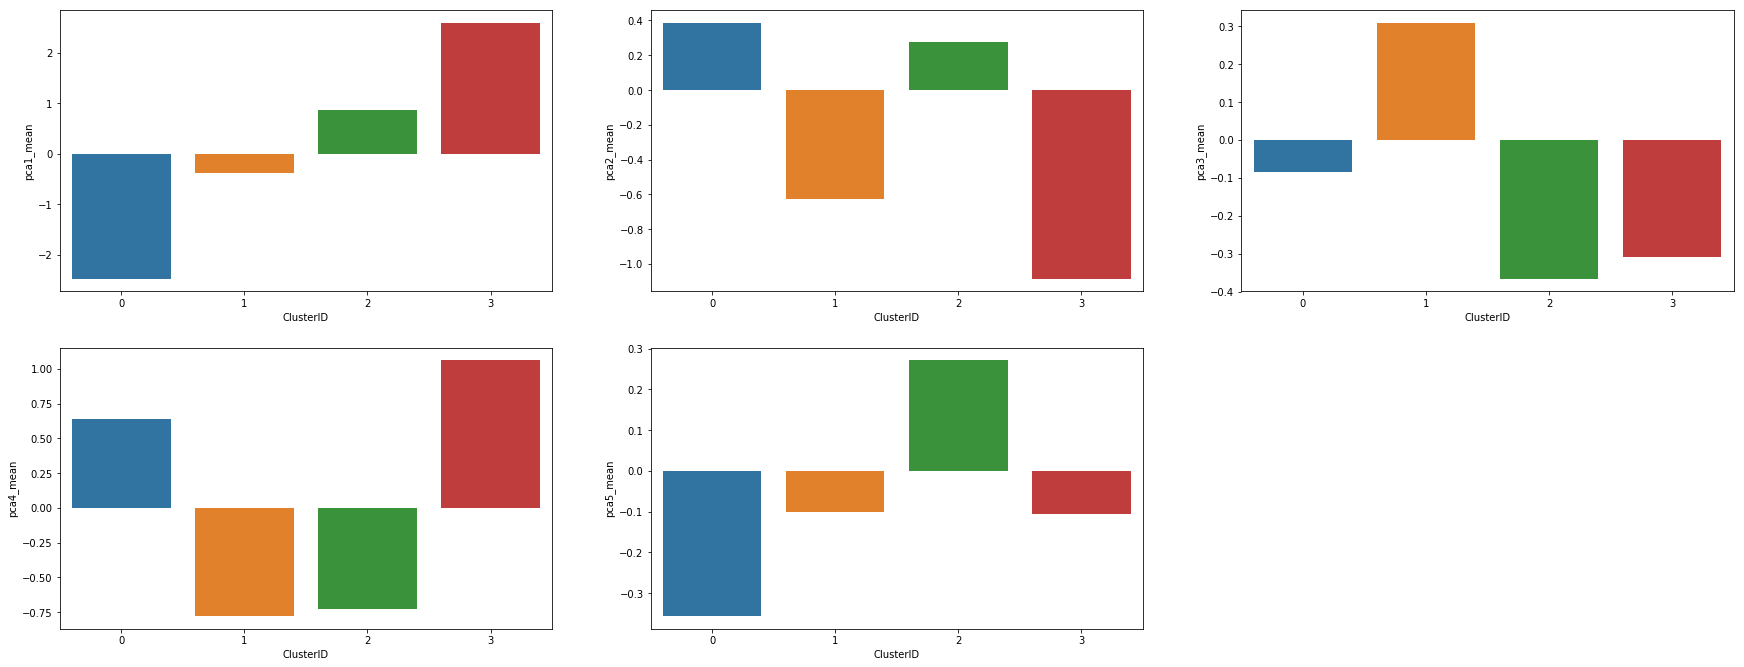

In [92]:
plt.figure(figsize=(30, 30))


plt.subplot(5,3,1)
sns.barplot(x=data_frame1.ClusterID, y=data_frame1.pca1_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame1.ClusterID, y=data_frame1.pca2_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame1.ClusterID, y=data_frame1.pca3_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame1.ClusterID, y=data_frame1.pca4_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame1.ClusterID, y=data_frame1.pca5_mean)


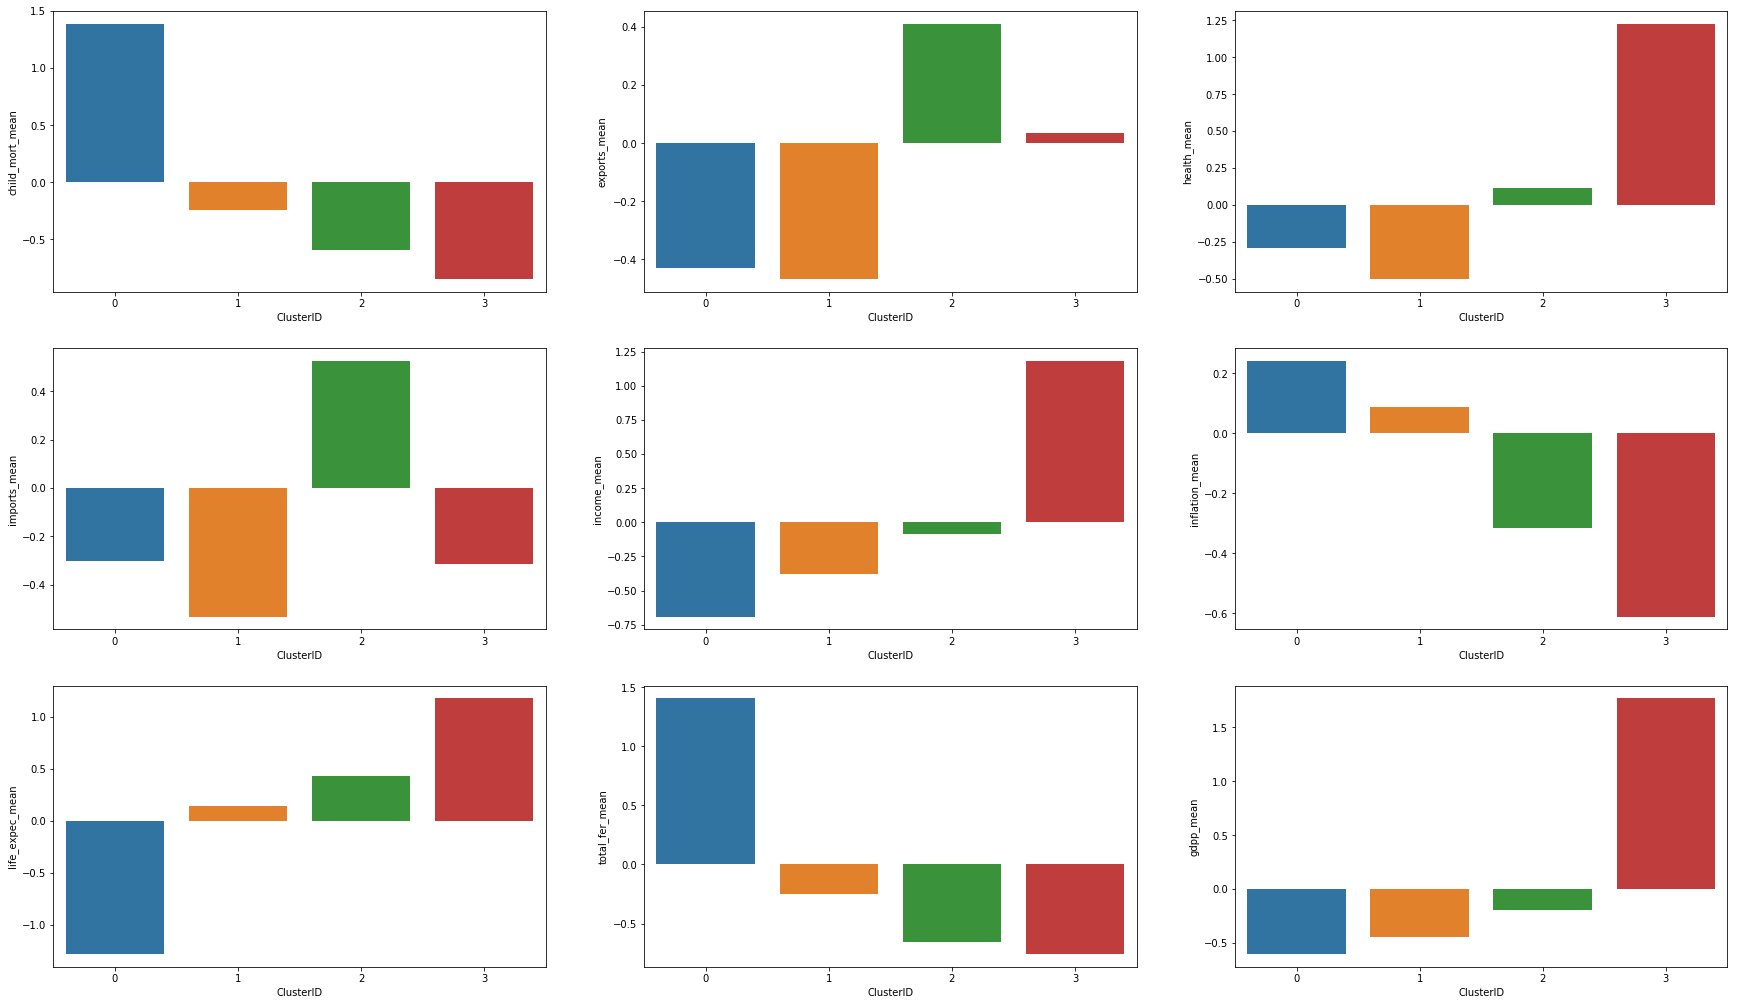

In [93]:
plt.figure(figsize=(30, 30))

plt.subplot(5,3,1)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=data_frame1.ClusterID,y=data_frame1.gdpp_mean)

##### After observation of the bar plots of principle componets & original features below are conclusions were obtained/obtained.

#### #1 principle components - 1's mean is very low for cluster_id-'3' which means that Cluster-1 has low-income,low-gdpp, high-child_mort &  high-fert_rate


In [94]:
## Let's dig it out the countries which falls under cluster 3
df_new7_km[df_new7_km.ClusterID == 3]

Country      pca1      pca2      pca3      pca4      pca5  \
7         australia  2.342153 -1.989710  0.198795  1.113413 -0.710654   
8           austria  2.973841 -0.735152 -0.528284  1.201101  0.080167   
15          belgium  3.143756  0.662482 -0.659855  1.087644  0.445979   
28           canada  2.543776 -1.727357 -0.401760  1.334434  0.070455   
43          denmark  3.010642 -0.865284 -0.347129  1.784755  0.113204   
52          finland  2.458938 -1.077568 -0.096898  0.902881 -0.453489   
53           france  2.254272 -1.869086 -0.712034  1.226731  0.125576   
57          germany  2.671521 -1.274251 -0.662273  1.120510  0.137978   
59           greece  1.779513 -1.767467 -0.681162  0.258244  0.069902   
67          iceland  2.480866 -0.634860  0.103016  0.922553  0.146519   
72          ireland  3.668267  1.726322 -0.530388  0.988469 -0.103747   
73           israel  1.484961 -1.053400  0.094823  0.330188 -0.426202   
74            italy  2.165798 -1.773979 -0.278350  0.517783 -0.289743   
76            japan  2.265791 -2.438008 -0.217737  0.717556 -0.665753   
101     netherlands  3.379144  0.114564 -0.752357  1.535997  0.379078   
102     new zealand  1.815706 -1.586191 -0.257365  0.736225  0.079378   
104          norway  3.721541 -1.443778  0.878486  2.775929 -0.747763   
111        portugal  1.814096 -1.452983 -0.943382  0.185204  0.345130   
124           spain  2.019143 -1.786179 -0.373238  0.264334 -0.194777   
129          sweden  2.818263 -0.915851 -0.101273  1.245701 -0.309937   
130     switzerland  4.088623 -0.429291 -0.276359  2.306719 -0.184681   
142  united kingdom  2.067999 -1.536828 -0.249088  0.792830 -0.223893   

     child_mort   exports    health   imports    income  inflation  \
7     -0.832423 -0.779697  0.699011 -1.076779  1.261966  -0.628316   
8     -0.844858  0.372890  1.527901  0.037693  1.355617  -0.655549   
15    -0.839884  1.291301  1.418356  1.152164  1.246357  -0.559999   
28    -0.812526 -0.439409  1.637446 -0.658334  1.225546  -0.466062   
43    -0.849832  0.343618  1.673961 -0.136314  1.397240  -0.432852   
52    -0.877190 -0.088145  0.779344 -0.393181  1.178720  -0.705079   
53    -0.847345 -0.523567  1.856536 -0.778482  1.027838  -0.638754   
57    -0.847345  0.043580  1.746991 -0.405610  1.209937  -0.666461   
59    -0.854806 -0.695540  1.272296 -0.670763  0.601205  -0.674526   
67    -0.887138  0.449729  0.943661 -0.148743  1.126692  -0.219360   
72    -0.847345  2.264597  0.866980  1.641040  1.485688  -1.043915   
73    -0.837397 -0.223528  0.297346 -0.579617  0.648030  -0.570436   
74    -0.852319 -0.582111  0.991131 -0.815769  0.991418  -0.708115   
76    -0.872216 -0.955329  0.976525 -1.379219  0.970606  -0.918666   
101   -0.839884  1.130305  1.856536  0.692289  1.475282  -0.657921   
102   -0.797604 -0.395501  1.199266 -0.782625  0.788507  -0.384461   
104   -0.872216 -0.051555  0.972873 -0.761910  2.349360  -0.173815   
111   -0.854806 -0.410137  1.527901 -0.393181  0.523162  -0.677372   
124   -0.857293 -0.571134  0.994782 -0.832341  0.798913  -0.723202   
129   -0.877190  0.186281  1.027646 -0.256462  1.340008  -0.644352   
130   -0.839884  0.837584  1.710476  0.265559  1.995566  -0.708305   
142   -0.822475 -0.472340  1.031297 -0.666620  0.991418  -0.589413   

     life_expec  total_fer      gdpp  ClusterID  
7      1.290735  -0.674457  2.130699          3  
8      1.121559  -0.999109  1.857082          3  
15     1.065167  -0.720836  1.720274          3  
28     1.211786  -0.873224  1.884444          3  
43     1.008775  -0.714211  2.464511          3  
52     1.065167  -0.714211  1.818776          3  
53     1.223065  -0.608202  1.512325          3  
57     1.076446  -1.032237  1.577993          3  
59     1.110281  -0.972607  0.762616          3  
67     1.290735  -0.495567  1.583465          3  
72     1.110281  -0.594951  1.955584          3  
73     1.223065   0.054353  0.965092          3  
74     1.256900  -0.985858  1.249653          3  
76     1.380962  -1.0

In [95]:
# try above steps with number of clusters = 5
# Kmeans with K=5
model_clust5 = KMeans(n_clusters = 5, max_iter=100)
model_clust5.fit(cls_cont)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [96]:
model_clust5.labels_

array([1, 2, 3, 4, 2, 3, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 2, 1, 2, 3, 2, 4,
       3, 2, 1, 1, 2, 1, 0, 2, 1, 1, 3, 3, 3, 4, 1, 4, 2, 1, 2, 2, 2, 0,
       3, 3, 3, 3, 4, 4, 2, 2, 0, 0, 4, 4, 2, 0, 4, 0, 3, 3, 1, 1, 2, 1,
       2, 0, 3, 3, 3, 4, 0, 0, 0, 3, 0, 2, 3, 4, 2, 4, 2, 2, 2, 2, 2, 4,
       1, 2, 2, 1, 4, 2, 2, 2, 3, 1, 3, 4, 3, 0, 0, 1, 0, 4, 2, 2, 3, 3,
       2, 0, 3, 3, 4, 3, 4, 2, 1, 2, 2, 4, 4, 2, 0, 3, 3, 4, 2, 0, 0, 4,
       4, 2, 4, 1, 3, 2, 3, 4, 1, 2, 0, 3, 3, 4, 2, 4, 1])

In [97]:
# analysis of clusters formed
df_new8 = df_new7
df_new8.index = pd.RangeIndex(len(df_new8.index))
df_new8_km = pd.concat([df_new7, pd.Series(model_clust5.labels_)], axis=1)
df_new8_km.columns = ['Country', 'pca1', 'pca2', 'pca3','pca4','pca5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

clustl_pca1 = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).pca1.mean())
clustl_pca2 = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).pca2.mean())
clustl_pca3 = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).pca3.mean())
clustl_pca4 = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).pca4.mean())
clustl_pca5 = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).pca5.mean())
clustl_child_mort = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).child_mort.mean())
clustl_exports = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).exports.mean())
clustl_health = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).health.mean())
clustl_imports = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).imports.mean())
clustl_income = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).income.mean())
clustl_inflation = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).inflation.mean())
clustl_life_expec = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).life_expec.mean())
clustl_total_fer = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).total_fer.mean())
clustl_gdpp = 	pd.DataFrame(df_new8_km.groupby(["ClusterID"]).gdpp.mean())

In [98]:
data_frame2 = pd.concat([pd.Series([0,1,2,3,4]), clustl_pca1,clustl_pca2,clustl_pca3,clustl_pca4,clustl_pca5,clustl_child_mort,clustl_exports,clustl_health,clustl_imports,clustl_income,clustl_inflation,clustl_life_expec,clustl_total_fer,clustl_gdpp], axis=1)
data_frame2.columns = ["ClusterID", "pca1_mean","pca2_mean","pca3_mean","pca4_mean","pca5_mean","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
data_frame2.head()

ClusterID  pca1_mean  pca2_mean  pca3_mean  pca4_mean  pca5_mean  \
0          0   2.589482  -1.084266  -0.308810   1.061327  -0.105331   
1          1  -3.088478   0.497875  -0.521800   1.081163  -0.541310   
2          2   0.864049   0.274361  -0.347172  -0.757722   0.234533   
3          3  -0.297616  -0.802156   0.356491  -0.807639  -0.080884   
4          4  -1.713719   0.338652   0.220141   0.131882  -0.134767   

   child_mort_mean  exports_mean  health_mean  imports_mean  income_mean  \
0        -0.848363      0.033268     1.227648     -0.315782     1.181322   
1         1.960180     -0.597991    -0.027638     -0.284427    -0.813024   
2        -0.589464      0.409155     0.071034      0.514784    -0.084195   
3        -0.298414     -0.554732    -0.484805     -0.637896    -0.346233   
4         0.722363     -0.196709    -0.480829     -0.201375    -0.580322   

   inflation_mean  life_expec_mean  total_fer_mean  gdpp_mean  
0       -0.611224         1.176926       -0.756976   1.768530  
1        0.021152        -1.738643        1.766396  -0.673715  
2       -0.333205         0.435331       -0.667979  -0.201371  
3        0.116308         0.235077       -0.340719  -0.423914  
4        0.364855        -0.803288        0.971379  -0.544429

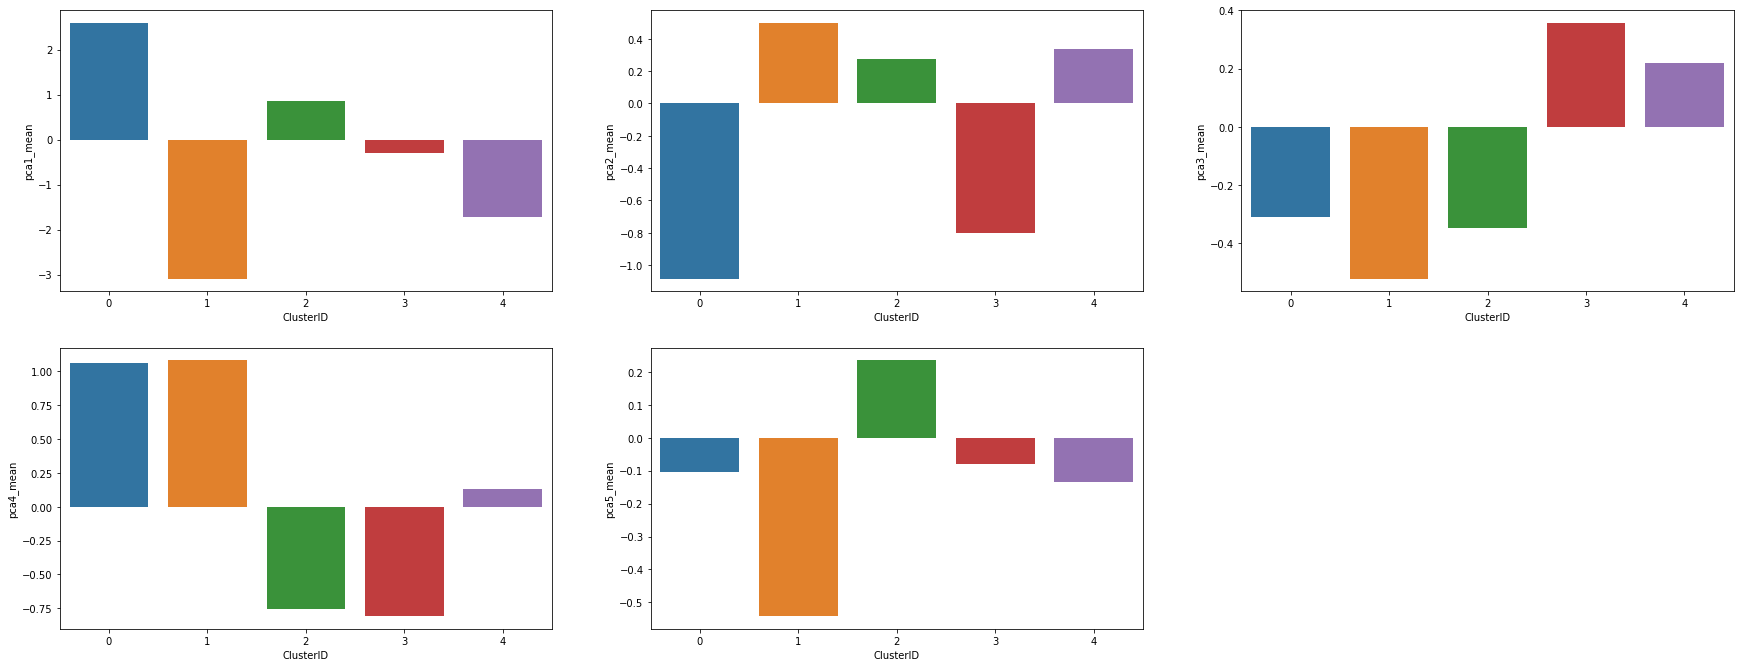

In [99]:
plt.figure(figsize=(30, 30))


plt.subplot(5,3,1)
sns.barplot(x=data_frame2.ClusterID, y=data_frame2.pca1_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame2.ClusterID, y=data_frame2.pca2_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame2.ClusterID, y=data_frame2.pca3_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame2.ClusterID, y=data_frame2.pca4_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame2.ClusterID, y=data_frame2.pca5_mean)

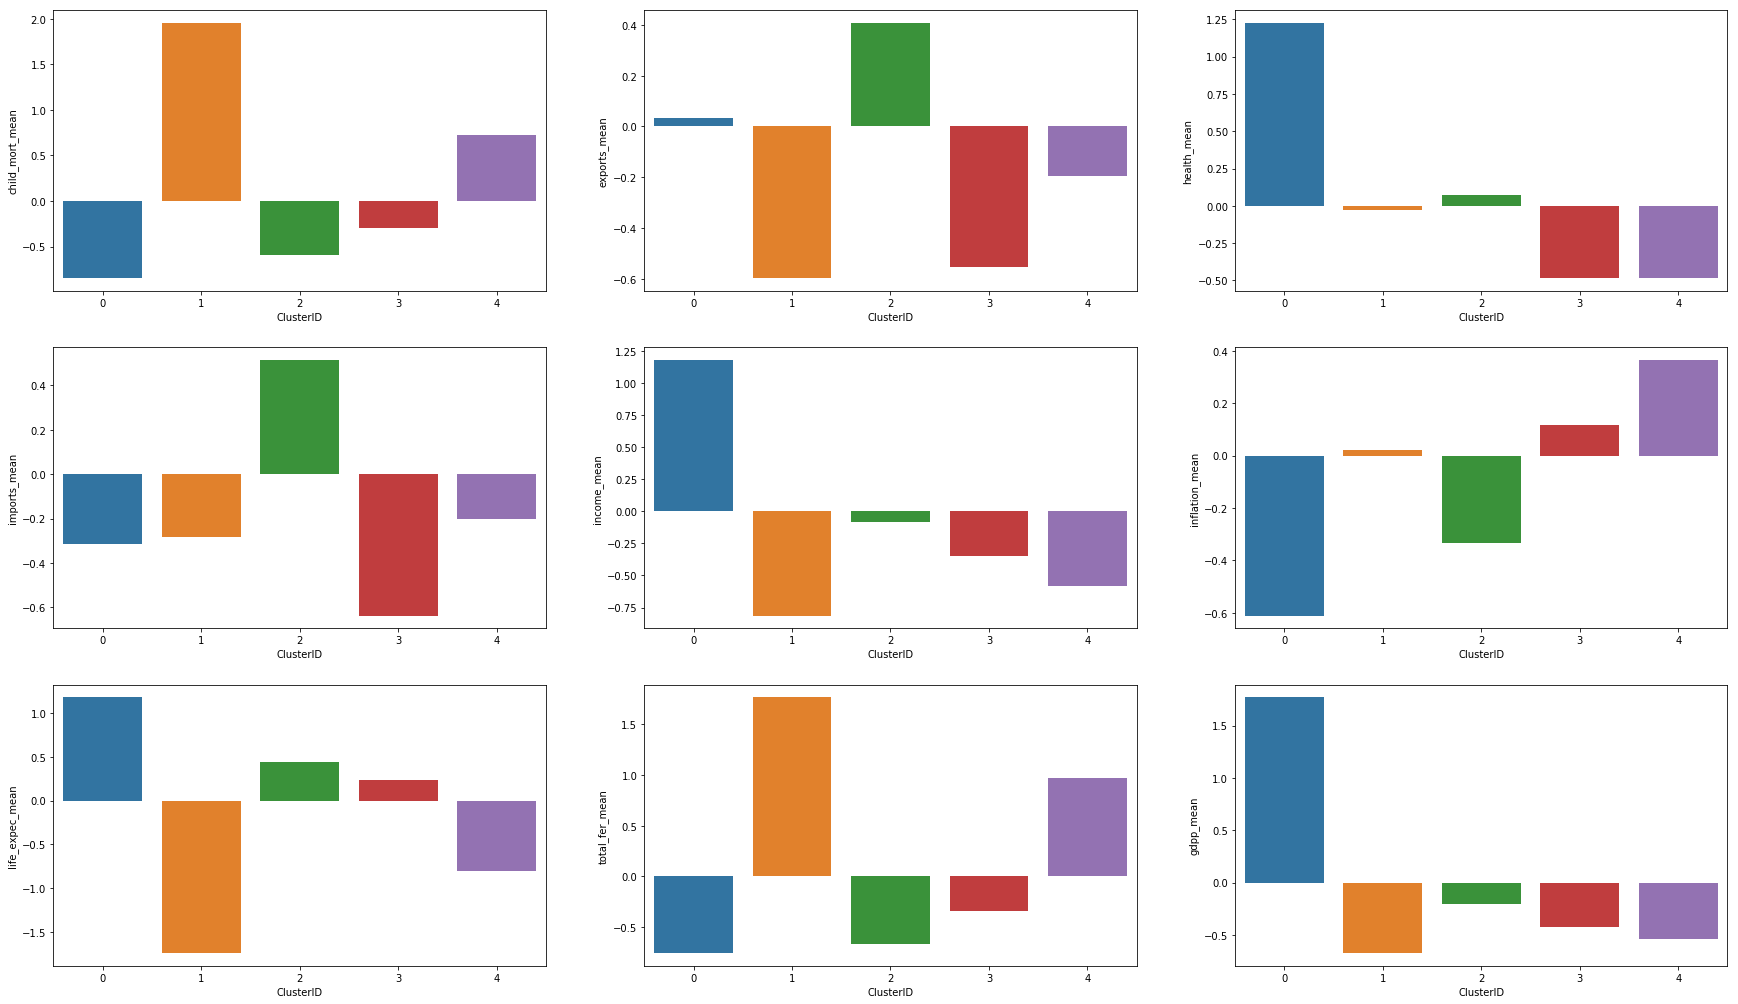

In [100]:
plt.figure(figsize=(30, 30))
plt.subplot(5,3,1)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=data_frame2.ClusterID,y=data_frame2.gdpp_mean)

# Hierarchical clustering

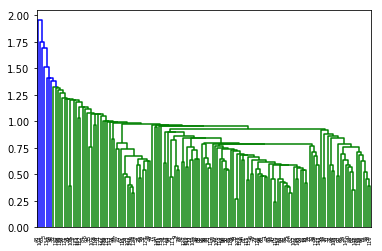

In [101]:
# heirarchical clustering with single linkage
hierar_1 = linkage(cls_cont, method = "single", metric='euclidean')
dendrogram(hierar_1)
plt.show()

#### We see that with Single linkage method it is clumpsy, it's better to assign cluster-Id's to each record and calculate means by cluster-wise

In [102]:
clustercut = pd.Series(cut_tree(hierar_1, n_clusters = 4).reshape(-1,))
cnt_1hc = pd.concat([df_new6, clustercut], axis=1)
cnt_1hc.columns = ['Country', 'pca1', 'pca2', 'pca3','pca4','pca5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

In [103]:
clusth1_pca1 = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).pca1.mean())
clusth1_pca2 = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).pca2.mean())
clusth1_pca3 = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).pca3.mean())
clusth1_pca4 = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).pca4.mean())
clusth1_pca5 = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).pca5.mean())
clusth1_child_mort = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).child_mort.mean())
clusth1_exports = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).exports.mean())
clusth1_health = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).health.mean())
clusth1_imports = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).imports.mean())
clusth1_income = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).income.mean())
clusth1_inflation = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).inflation.mean())
clusth1_life_expec = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).life_expec.mean())
clusth1_total_fer = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).total_fer.mean())
clusth1_gdpp = 	pd.DataFrame(cnt_1hc.groupby(["ClusterID"]).gdpp.mean())

In [104]:
data_frame3 = pd.concat([pd.Series([0,1,2,3]), clusth1_pca1,clusth1_pca2,clusth1_pca3,clusth1_pca4,clusth1_pca5,clusth1_child_mort,clusth1_exports,clusth1_health,clusth1_imports,clusth1_income,clusth1_inflation,clusth1_life_expec,clusth1_total_fer,clusth1_gdpp], axis=1)
data_frame3.columns = ["ClusterID", "pca1_mean","pca2_mean","pca3_mean","pca4_mean","pca5_mean","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
data_frame3.head()

ClusterID  pca1_mean  pca2_mean  pca3_mean  pca4_mean  pca5_mean  \
0          0  -0.141268  -0.158612  -0.106554  -0.137856  -0.049959   
1          1  -1.293264   2.372017   1.758962   1.748293   0.091883   
2          2  -4.408941   1.747149  -1.512177   1.771193  -1.109244   
3          3   3.721541  -1.443778   0.878486   2.775929  -0.747763   

   child_mort_mean  exports_mean  health_mean  imports_mean  income_mean  \
0        -0.014280     -0.124534    -0.003103     -0.121284    -0.166053   
1         1.808842      1.635248    -0.852877      0.497568     0.861347   
2         4.221297     -0.944352     0.034438      0.737863    -0.813969   
3        -0.872216     -0.051555     0.972873     -0.761910     2.349360   

   inflation_mean  life_expec_mean  total_fer_mean  gdpp_mean  
0       -0.104969         0.010251        0.012513  -0.115159  
1        1.624268        -1.089007        1.498724   0.226327  
2       -0.221257        -4.337186        0.253120  -0.673215  
3       -0.173815         1.177951       -0.661206   4.095266

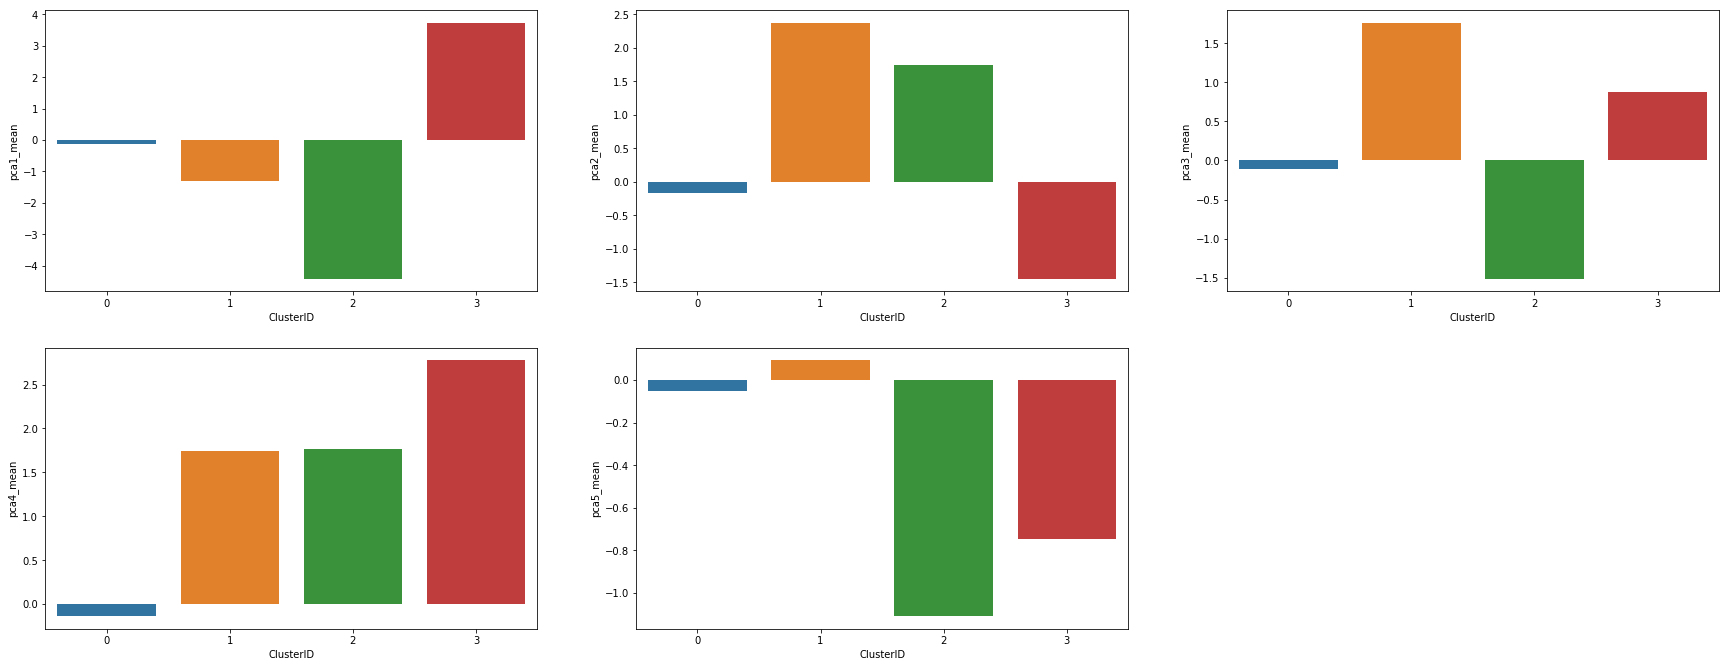

In [105]:
## Let's draw Barplots of means of PC's by clusterwise

plt.figure(figsize=(30, 30))
plt.subplot(5,3,1)
sns.barplot(x=data_frame3.ClusterID, y=data_frame3.pca1_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame3.ClusterID, y=data_frame3.pca2_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame3.ClusterID, y=data_frame3.pca3_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame3.ClusterID, y=data_frame3.pca4_mean)


plt.subplot(5,3,5)
sns.barplot(x=data_frame3.ClusterID, y=data_frame3.pca5_mean)

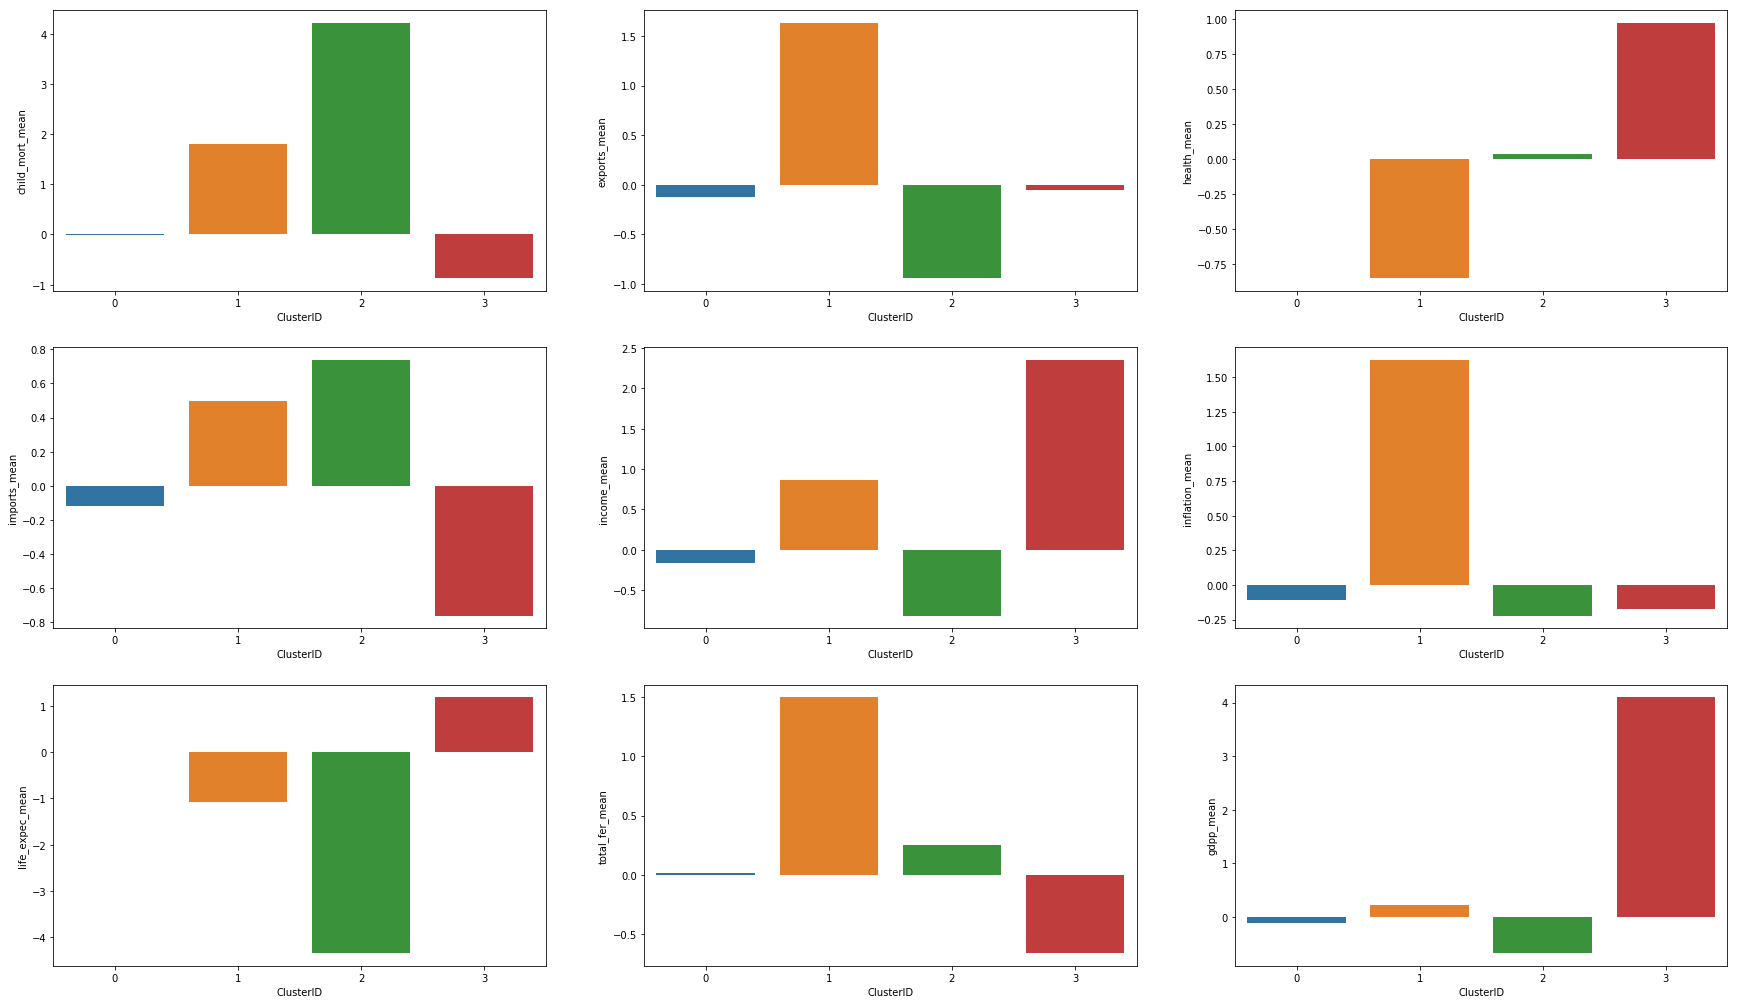

In [106]:

# Barplots of means of original features by cluster-wise

plt.figure(figsize=(30, 30))


plt.subplot(5,3,1)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=data_frame3.ClusterID,y=data_frame3.gdpp_mean)

In [107]:
cnt_1hc[cnt_1hc.ClusterID == 2]

Country      pca1      pca2      pca3      pca4      pca5  child_mort  \
65   haiti -4.408941  1.747149 -1.512177  1.771193 -1.109244    4.221297   

     exports    health   imports    income  inflation  life_expec  total_fer  \
65 -0.944352  0.034438  0.737863 -0.813969  -0.221257   -4.337186    0.25312   

        gdpp  ClusterID  
65 -0.673215          2

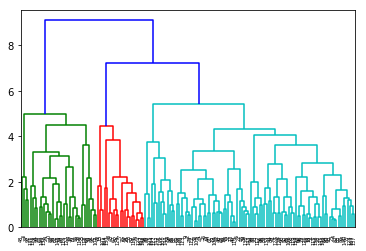

In [108]:
### COMPLETE LINKAGE METHOD ##
hierar_2 = linkage(cls_cont, method = "complete", metric='euclidean')
dendrogram(hierar_2)
plt.show()

In [109]:
clustercut2 = pd.Series(cut_tree(hierar_2, n_clusters = 4).reshape(-1,))
cnt_2hc = pd.concat([df_new6, clustercut2], axis=1)
cnt_2hc.columns = ['Country', 'pca1', 'pca2', 'pca3','pca4','pca5','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp', 'ClusterID']

In [110]:
clusth2_pca1 = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).pca1.mean())
clusth2_pca2 = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).pca2.mean())
clusth2_pca3 = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).pca3.mean())
clusth2_pca4 = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).pca4.mean())
clusth2_pca5 = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).pca5.mean())
clusth2_child_mort = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).child_mort.mean())
clusth2_exports = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).exports.mean())
clusth2_health = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).health.mean())
clusth2_imports = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).imports.mean())
clusth2_income = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).income.mean())
clusth2_inflation = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).inflation.mean())
clusth2_life_expec = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).life_expec.mean())
clusth2_total_fer = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).total_fer.mean())
clusth2_gdpp = 	pd.DataFrame(cnt_2hc.groupby(["ClusterID"]).gdpp.mean())

In [111]:
data_frame4 = pd.concat([pd.Series([0,1,2,3]), clusth2_pca1,clusth2_pca2,clusth2_pca3,clusth2_pca4,clusth2_pca5,clusth2_child_mort,clusth2_exports,clusth2_health,clusth2_imports,clusth2_income,clusth2_inflation,clusth2_life_expec,clusth2_total_fer,clusth2_gdpp], axis=1)
data_frame4.columns = ["ClusterID", "pca1_mean","pca2_mean","pca3_mean","pca4_mean","pca5_mean","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
data_frame4.head()

ClusterID  pca1_mean  pca2_mean  pca3_mean  pca4_mean  pca5_mean  \
0          0  -2.527288   0.559933  -0.329271   0.774477  -0.391974   
1          1   0.408283  -0.147601  -0.060603  -0.763540   0.080433   
2          2   2.642078  -1.085736  -0.328030   1.096144  -0.090051   
3          3  -1.773158  -0.350796   0.607182  -0.149975  -0.019682   

   child_mort_mean  exports_mean  health_mean  imports_mean  income_mean  \
0         1.503299     -0.357921    -0.140082     -0.156054    -0.700450   
1        -0.478264      0.040744    -0.161420      0.044218    -0.177674   
2        -0.848885      0.045496     1.271948     -0.303219     1.206716   
3         0.574902     -0.684879    -0.666650     -0.649853    -0.654204   

   inflation_mean  life_expec_mean  total_fer_mean  gdpp_mean  
0        0.089367        -1.435320        1.490539  -0.609169  
1       -0.174427         0.359562       -0.508239  -0.274758  
2       -0.613166         1.174729       -0.795610   1.806789  
3        0.692559        -0.527504        0.686147  -0.601078

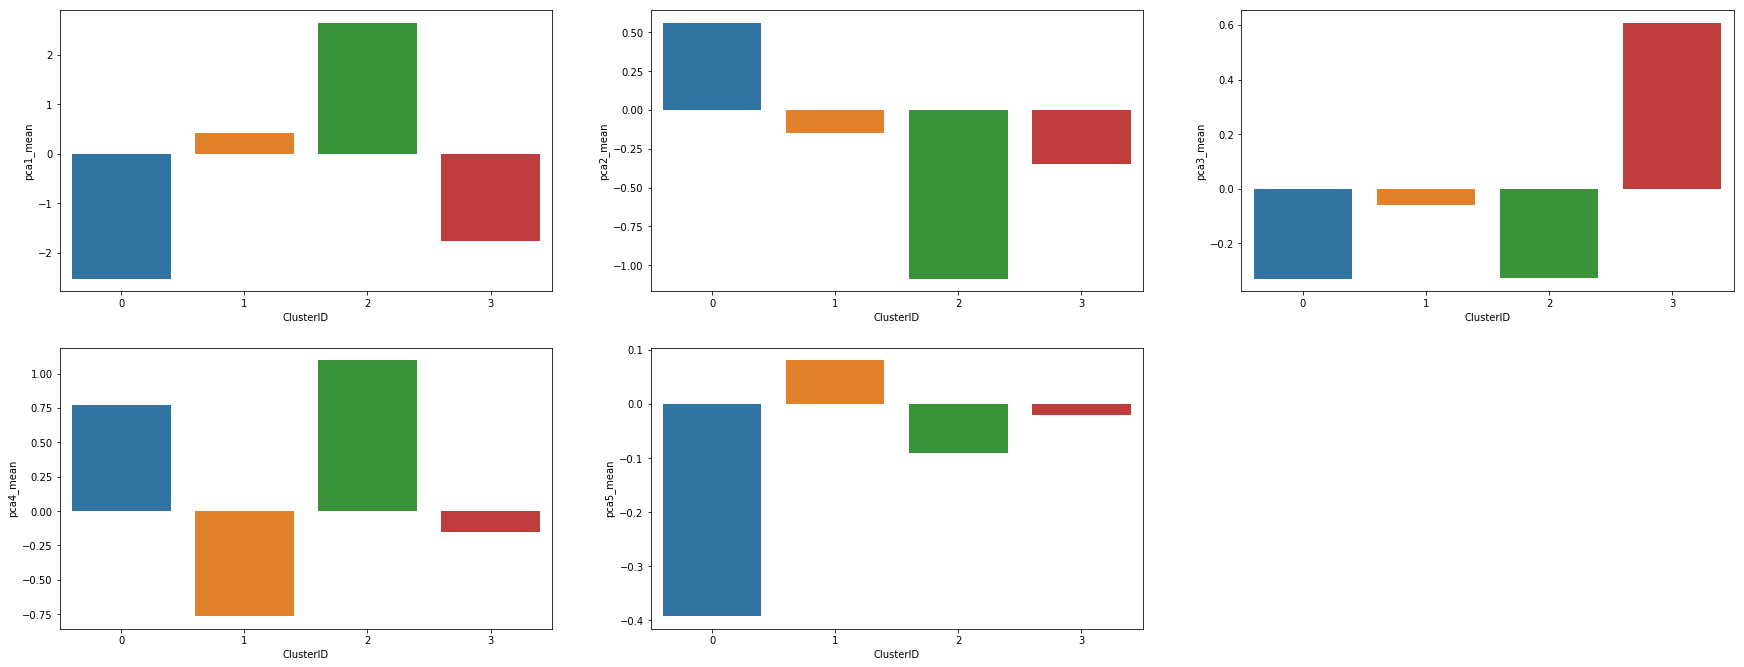

In [112]:
## Let's draw Barplots of means of original PC's by clusterwise

plt.figure(figsize=(30, 30))


plt.subplot(5,3,1)
sns.barplot(x=data_frame4.ClusterID, y=data_frame4.pca1_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame4.ClusterID, y=data_frame4.pca2_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame4.ClusterID, y=data_frame4.pca3_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame4.ClusterID, y=data_frame4.pca4_mean)


plt.subplot(5,3,5)
sns.barplot(x=data_frame4.ClusterID, y=data_frame4.pca5_mean)

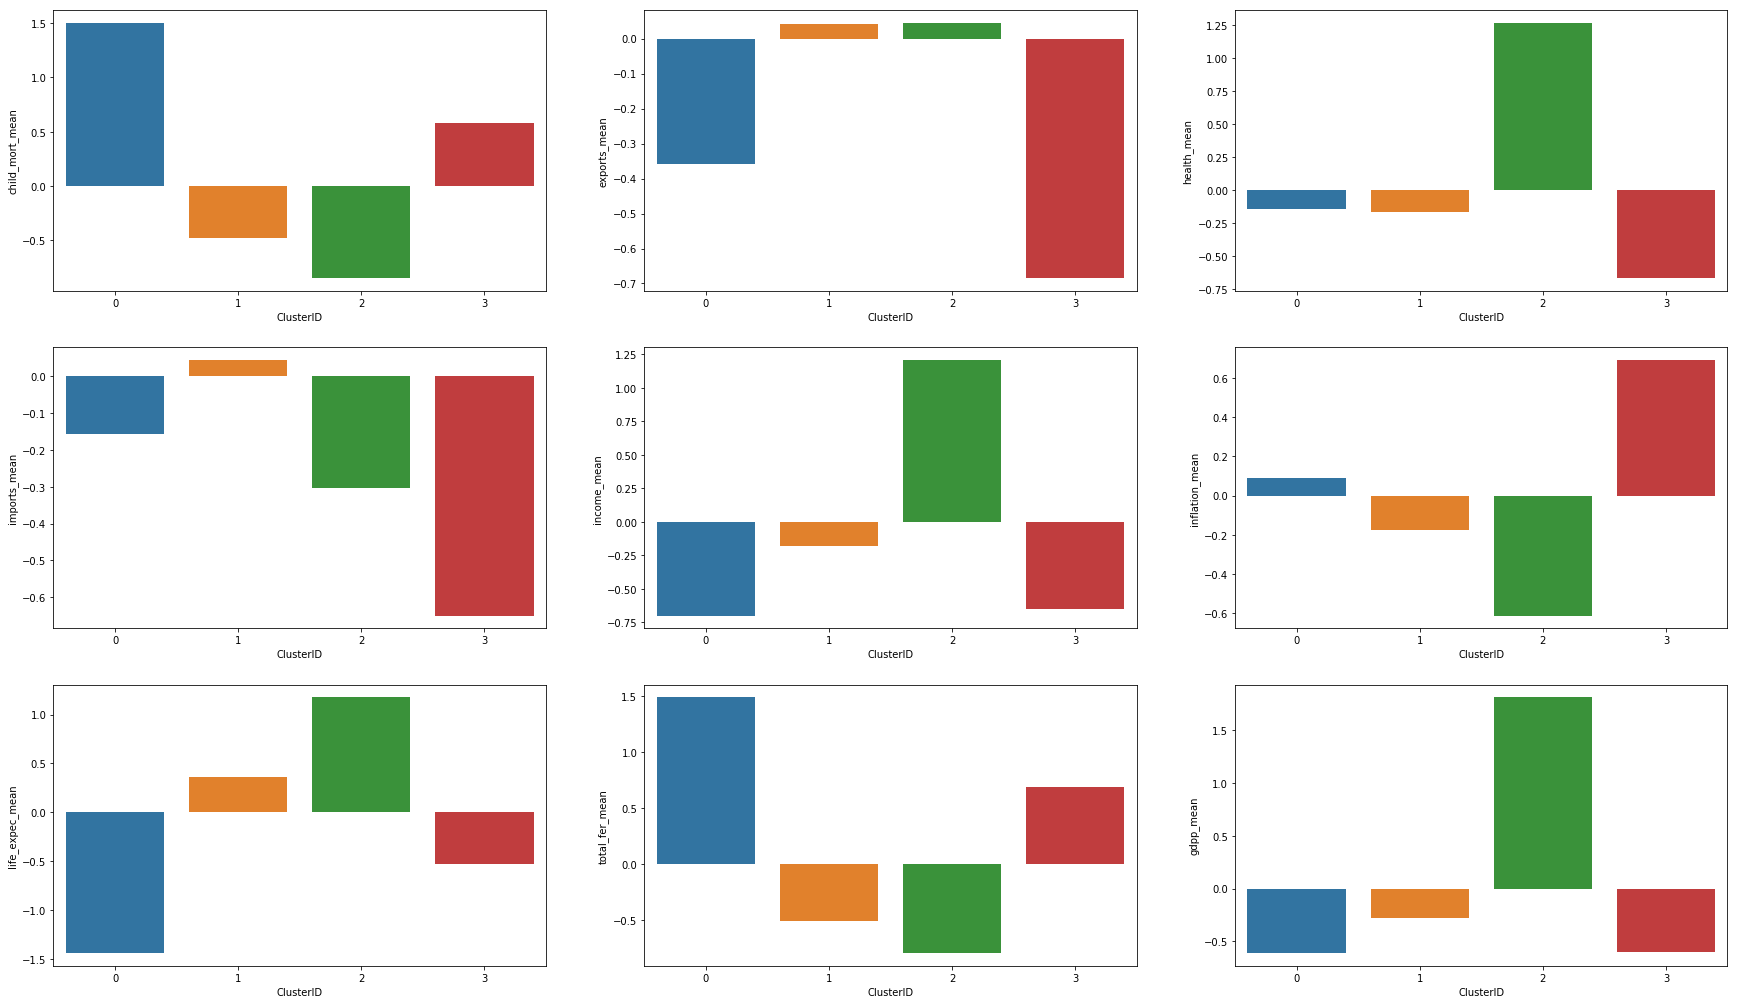

In [113]:
## Let's draw Barplots of means of PC's by clusterwise

plt.figure(figsize=(30, 30))
plt.subplot(5,3,1)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.child_mort_mean)

plt.subplot(5,3,2)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.exports_mean)

plt.subplot(5,3,3)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.health_mean)

plt.subplot(5,3,4)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.imports_mean)

plt.subplot(5,3,5)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.income_mean)

plt.subplot(5,3,6)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.inflation_mean)

plt.subplot(5,3,7)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.life_expec_mean)

plt.subplot(5,3,8)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.total_fer_mean)

plt.subplot(5,3,9)
sns.barplot(x=data_frame4.ClusterID,y=data_frame4.gdpp_mean)

### Assigning back the outliers to the nearest cluster

In [114]:
cnt_2hc[cnt_2hc.ClusterID == 0]
cnt_2hc[cnt_2hc.ClusterID == 1]

Country      pca1      pca2      pca3      pca4  \
1                           albania  0.429870 -0.589373 -0.328611 -1.165014   
2                           algeria -0.285289 -0.452139  1.232051 -0.857767   
4               antigua and barbuda  1.033371  0.133853 -0.216699 -0.846638   
5                         argentina  0.022890 -1.772736  0.864500 -0.036747   
6                           armenia -0.101463 -0.567318  0.248107 -1.466023   
9                        azerbaijan -0.181303 -0.396895  0.868399 -0.435201   
10                          bahamas  1.268740 -0.658658 -0.484555  0.053945   
11                          bahrain  1.671024  0.563934  0.997464 -0.197912   
12                       bangladesh -1.123979 -0.961083  0.542964 -1.189204   
13                         barbados  1.081196 -0.484983 -0.658991 -0.526571   
14                          belarus  0.580574  0.541405  0.471986 -1.042085   
16                           belize  0.210908  0.695633 -0.261731 -1.094244   
18                           bhutan -0.156696  0.776113 -0.279266 -1.042724   
19                          bolivia -0.794151 -0.120997  0.414132 -0.717824   
20           bosnia and herzegovina  0.995909 -0.974806 -1.534071 -0.638488   
22                           brazil  0.141007 -2.149631 -0.169567 -0.170220   
23                         bulgaria  0.906504  0.028728 -0.465601 -0.999039   
26                         cambodia -0.582622  0.892420 -0.494662 -0.808601   
29                       cape verde -0.156105  0.346726 -0.277912 -1.341779   
32                            chile  0.951656 -1.075390  0.155563 -0.436591   
33                            china  0.057475 -1.188837  0.441723 -1.272651   
34                         colombia  0.121021 -1.770741 -0.230759 -0.714391   
38                       costa rica  0.937738 -1.352109 -0.821289 -0.269325   
40                          croatia  1.148796 -0.846517 -0.400904 -0.625047   
41                           cyprus  2.174407 -0.004717  0.261252 -0.307912   
42                   czech republic  2.053083  0.420869 -0.540333 -0.415480   
44               dominican republic -0.231280 -0.882441 -0.025072 -0.650734   
45                          ecuador  0.009446 -1.046991 -0.265294 -0.489875   
46                            egypt -0.848191 -0.819519  0.597771 -0.737765   
47                      el salvador  0.081730 -0.570936 -0.567211 -0.980210   
..                              ...       ...       ...       ...       ...   
89                         malaysia  1.230660  1.602913  0.543110 -1.083118   
90                         maldives  1.108112  1.006326 -0.260904 -1.089662   
93                        mauritius  0.899701  0.415088 -0.378265 -1.076085   
94                          moldova  0.510139  0.164006 -1.600325 -0.448194   
95                       montenegro  1.026663 -0.260757 -1.106141 -0.727752   
96                          morocco -0.233243 -0.285034 -0.244343 -1.073231   
106                          panama  1.163391  1.111175 -0.790469 -0.552013   
107                        paraguay  0.117540  0.359153 -0.036947 -0.945684   
108                            peru -0.020976 -1.088585  0.426927 -1.060470   
109                     philippines -0.783009 -0.098837  0.329684 -1.073845   
110                          poland  1.217813 -0.660064 -0.304717 -0.697655   
112                         romania  0.572838 -0.637312  0.096213 -1.028554   
113                          russia  0.164339 -1.059630  1.091334 -0.640937   
115                           samoa -0.563301 -0.029484 -0.619939 -0.530824   
117                          serbia  0.832652 -0.869344 -1.026799 -0.518551   
119                 slovak republic  2.029661  1.049005 -0.863287 -0.382333   
120                        slovenia  2.279298  0.192449 -0.802426 -0.073966   
123                     south korea  1.918016 -0.427112  0.145716 -0.470615   
125                       sri lanka -0.575132 -0.989932  1.755726 -1.369302   